In [1]:
import numpy as np
import scipy.linalg
import os
import time
from copy import deepcopy

from matplotlib import pyplot as plt


In [14]:

# Compute || [R,I] ||_F / ( ||R@I||_F )
def Commutator_scal(TensorArray,N0,Frequencies):
    nfreq = np.shape(Frequencies)[0]

    data = np.zeros(nfreq)

# Loop through each frequency and compute sorted eigenvalues and eigenvectors
    for n in range(nfreq):
        # Obtain real and imaginary parts of the tensor
        Mlist = TensorArray[n,:]
        Mten = np.array([[Mlist[0], Mlist[1], Mlist[2]],[Mlist[3], Mlist[4], Mlist[5]],[Mlist[6], Mlist[7], Mlist[8]]])
        R = np.real(Mten)
        I = np.imag(Mten)
        Z = (R-N0) @ I - I @ (R-N0)
        data[n] = np.linalg.norm(Z,ord='fro') /np.linalg.norm((R-N0)@I,ord='fro')
    return data


def Normalised_commutator(TensorArray,N0,Frequencies,thetafrombillmes,dataK, datauR, datauI):
    nfreq = np.shape(Frequencies)[0]

    data = np.zeros(nfreq)
    data_min = np.zeros(nfreq)
    data_max = np.zeros(nfreq)

# Loop through each frequency and compute sorted eigenvalues and eigenvectors
    for n in range(nfreq):
        # Obtain real and imaginary parts of the tensor
        Mlist = TensorArray[n,:]
        Mten = np.array([[Mlist[0], Mlist[1], Mlist[2]],[Mlist[3], Mlist[4], Mlist[5]],[Mlist[6], Mlist[7], Mlist[8]]])
        R = np.real(Mten)
        I = np.imag(Mten)
        Z = (R-N0) @ I - I @ (R-N0)
        Kvec=dataK[n,:]
        K =np.zeros((3,3))
        K[0,1]=-Kvec[2]
        K[1,0]=Kvec[2]
        K[0,2]=Kvec[1]
        K[2,0]=-Kvec[1]
        K[1,2]=-Kvec[0]
        K[2,1]=Kvec[0]
        uR=datauR[n,:]
        uI=datauI[n,:]

        
        #normalisation -= 2*np.trace(np.diag(uR)@np.diag(uR)@np.diag(uI)@np.diag(uI)@K@K)
        #normalisation -= 2*np.trace(np.diag(uR)@np.diag(uI)@K@np.diag(uR)@np.diag(uI)@K) \
        #-2*np.trace(np.diag(uR)@np.diag(uR)@np.diag(uI)@K@np.diag(uI)@K)\
        #-np.trace(np.diag(uI)@np.diag(uI)@np.diag(uR)@K@np.diag(uR)@K)\
        #-np.trace(np.diag(uR)@K@np.diag(uI)@np.diag(uI)@np.diag(uR)@K)
                                 
        
        #data[n] = np.linalg.norm(Z,ord='fro') /np.sqrt(np.abs(normalisation))#/np.linalg.norm((R-N0)@I,ord='fro')
        #data[n] = np.linalg.norm(Z,ord='fro') /np.linalg.norm((R-N0)@I,ord='fro')
        ####################
        #normalisation = np.trace(np.diag(uR)@np.diag(uR)@np.diag(uI)@np.diag(uI)@K@K)
        #normalisation -= np.trace(np.diag(uR)@np.diag(uR)@K@np.diag(uI)@np.diag(uI)@K)
        #data[n] = np.sqrt(np.linalg.norm((R-N0)@I,ord='fro')**2-np.trace(np.diag(uR)@np.diag(uR)@np.diag(uI)@np.diag(uI))) \
        #                                                         /np.sqrt(np.abs(normalisation))
        ###################
        
        ###################
        #normalisation = 2*np.trace(np.diag(uR)@np.diag(uR)@np.diag(uI)@np.diag(uI)@K@K)
        #normalisation += 2*np.trace(np.diag(uR)@np.diag(uI)@K@np.diag(uR)@np.diag(uI)@K) \
        #-2*np.trace(np.diag(uR)@np.diag(uR)@np.diag(uI)@K@np.diag(uI)@K)\
        #-np.trace(np.diag(uI)@np.diag(uI)@np.diag(uR)@K@np.diag(uR)@K)\
        #-np.trace(np.diag(uR)@K@np.diag(uI)@np.diag(uI)@np.diag(uR)@K)
        #data[n] = np.sqrt(np.abs(np.linalg.norm(Z,ord='fro')**2 - 2*np.linalg.norm((R-N0)@I,ord='fro')**2-2*np.trace(np.diag(uR)@np.diag(uR)@np.diag(uI)@np.diag(uI)))) \
        #           / np.sqrt(np.abs(2*normalisation))
        ###################
        #normalisation = 2*np.trace(np.diag(uR)@np.diag(uR)@np.diag(uI)@np.diag(uI)@K@K)
        #normalisation -= 2*np.trace(np.diag(uR)@np.diag(uR)@K@np.diag(uI)@np.diag(uI)@K)
        #normalisation -= 4*np.trace(np.diag(uR)@np.diag(uR)@np.diag(uI)@np.diag(uI)@K@K)
        #normalisation =  normalisation -4*np.trace(np.diag(uR)@np.diag(uI)@K@np.diag(uR)@np.diag(uI)@K) 
        #normalisation+= 4*np.trace(np.diag(uR)@np.diag(uR)@np.diag(uI)@K@np.diag(uI)@K )          
        #normalisation += 2*np.trace(np.diag(uI)@np.diag(uI)@np.diag(uR)@K@np.diag(uR)@K ) 
        #normalisation += 2*np.trace(np.diag(uR)@K@np.diag(uI)@np.diag(uI)@np.diag(uR)@K)
        
        
        normalisation= 2*np.trace(np.diag(uR)**2@K@K@np.diag(uI)**2 )
        normalisation -= 2*np.trace(np.diag(uR)**2@K@np.diag(uI)**2@K)
        normalisation -= 4*np.trace(K@np.diag(uR)@np.diag(uI)@K@np.diag(uR)@np.diag(uI))
        normalisation -= 4*np.trace(K@K@np.diag(uR)**2@np.diag(uI)**2)
        normalisation += 4*np.trace(K@np.diag(uR)@K@np.diag(uR)*np.diag(uI)**2)
        normalisation += 4*np.trace(K@np.diag(uI)@K@np.diag(uI)*np.diag(uR)**2)
        
        mat=np.zeros(3)
        mat[0]=2*(uR[1]-uR[2])**2*(uI[1]-uI[2])**2
        mat[1]=2*(uR[0]-uR[2])**2*(uI[0]-uI[2])**2
        mat[2]=2*(uR[0]-uR[1])**2*(uI[0]-uI[1])**2
        
        
        
        normalisation_min=np.min(mat)
        normalisation_max=np.max(mat)
        
        data[n] = np.sqrt(np.abs(np.linalg.norm(Z,ord='fro')**2 )) \
                   / np.sqrt(np.abs(normalisation))
        data_min[n] = np.sqrt(np.abs(np.linalg.norm(Z,ord='fro')**2 )) \
                   / np.sqrt(np.abs(normalisation_min))
        data_max[n] = np.sqrt(np.abs(np.linalg.norm(Z,ord='fro')**2 )) \
                   / np.sqrt(np.abs(normalisation_max))

        
    print("Normalised commutator with const")    
    print(data,data_min,data_max)
    time.sleep(10)
    return data
    

# Compute || [\tilde{R},I] ||_F / ( ||\tilde{R}@I||_F )
def TilCommutator_scal(TensorArray,N0,Frequencies):
    nfreq = np.shape(Frequencies)[0]

    data = np.zeros(nfreq)

# Loop through each frequency and compute sorted eigenvalues and eigenvectors
    for n in range(nfreq):
        # Obtain real and imaginary parts of the tensor
        Mlist = TensorArray[n,:]
        Mten = np.array([[Mlist[0], Mlist[1], Mlist[2]],[Mlist[3], Mlist[4], Mlist[5]],[Mlist[6], Mlist[7], Mlist[8]]])
        R = np.real(Mten)
        I = np.imag(Mten)
        Z = R @ I - I @ R
        data[n] = np.linalg.norm(Z,ord='fro') /np.linalg.norm(R@I,ord='fro')        
    return data

# Compute || \tilde{R}-I ||_F - || Lambda_\tilde{R} - Lambda_I ||_F
# use coefficents of the characteristic poly for the last measure
def TilBill_measure(TensorArray,N0,Frequencies):
    nfreq = np.shape(Frequencies)[0]

    data = np.zeros(nfreq)

# Loop through each frequency and compute sorted eigenvalues and eigenvectors
    for n in range(nfreq):
        # Obtain real and imaginary parts of the tensor
        Mlist = TensorArray[n,:]
        Mten = np.array([[Mlist[0], Mlist[1], Mlist[2]],[Mlist[3], Mlist[4], Mlist[5]],[Mlist[6], Mlist[7], Mlist[8]]])
        R = np.real(Mten)
        I = np.imag(Mten)
        
        Rpoly = np.zeros(4)
        Rpoly[0] = -1
        Rpoly[1] = np.trace(R)
        Rpoly[2] = -1/2*(np.trace(R)**2 - np.trace(R@R))
        Rpoly[3] = np.linalg.det(R)

        Ipoly = np.zeros(4)
        Ipoly[0] = -1
        Ipoly[1] = np.trace(I)
        Ipoly[2] = -1/2*(np.trace(I)**2 - np.trace(I@I))
        Ipoly[3] = np.linalg.det(I)
        
        uR,VR = np.linalg.eig(R)
        uI,VI = np.linalg.eig(I)
        ind = np.argsort(-np.abs(uR))
        uR = uR[ind]
        ind = np.argsort(-np.abs(uI))
        uI = uI[ind]
        #data[n] = np.linalg.norm(R-I)**2 - np.linalg.norm(uR-uI)**2
 
        data[n] = np.linalg.norm(R-I,ord='fro')**2 - np.linalg.norm(Rpoly-Ipoly)**2
        #normalisation = np.sqrt(np.linalg.norm(uR**2,ord=2)*np.linalg.norm(uI**2,ord=2))
        #data[n] = data[n] / normalisation
 
    return np.sqrt(np.abs(data))


# Compute || R-I ||_F - || Lambda_R - Lambda_I ||_F
# use coefficents of the characteristic poly for the last measure
def Bill_measure(TensorArray,N0,Frequencies):
    nfreq = np.shape(Frequencies)[0]

    data = np.zeros(nfreq)

# Loop through each frequency and compute sorted eigenvalues and eigenvectors
    for n in range(nfreq):
        # Obtain real and imaginary parts of the tensor
        Mlist = TensorArray[n,:]
        Mten = np.array([[Mlist[0], Mlist[1], Mlist[2]],[Mlist[3], Mlist[4], Mlist[5]],[Mlist[6], Mlist[7], Mlist[8]]])
        R = np.real(Mten)-N0
        I = np.imag(Mten)
        
        Rpoly = np.zeros(4)
        Rpoly[0] = -1
        Rpoly[1] = np.trace(R)
        Rpoly[2] = -1/2*(np.trace(R)**2 - np.trace(R@R))
        Rpoly[3] = np.linalg.det(R)

        Ipoly = np.zeros(4)
        Ipoly[0] = -1
        Ipoly[1] = np.trace(I)
        Ipoly[2] = -1/2*(np.trace(I)**2 - np.trace(I@I))
        Ipoly[3] = np.linalg.det(I)        
        
        uR,VR = np.linalg.eig(R)
        uI,VI = np.linalg.eig(I)
        ind = np.argsort(-np.abs(uR))
        uR = uR[ind]
        ind = np.argsort(-np.abs(uI))
        uI = uI[ind]
        
        data[n] = np.linalg.norm(R-I,ord='fro')**2 - np.linalg.norm(Rpoly-Ipoly)**2
        #data[n] = np.linalg.norm(R-I)**2 - np.linalg.norm(uR-uI)**2
        #normalisation = np.sqrt(np.linalg.norm(uR**2,ord=2)*np.linalg.norm(uI**2,ord=2))
        #data[n] = data[n] / normalisation

        
    return np.sqrt(np.abs(data))


# Compute || \tilde{R}-I ||_F - || Lambda_\tilde{R} - Lambda_I ||_F
# minmise over permutations
def TilBill_measure_perm(TensorArray,N0,Frequencies, datakvec):
    nfreq = np.shape(Frequencies)[0]

    data = np.zeros(nfreq)

    Perm = np.array([[1,2,3],[1,3,2],[2,1,3],[2,3,1],[3,1,2],[3,2,1]])
# Loop through each frequency and compute sorted eigenvalues and eigenvectors
    for n in range(nfreq):
        # Obtain real and imaginary parts of the tensor
        Mlist = TensorArray[n,:]
        Mten = np.array([[Mlist[0], Mlist[1], Mlist[2]],[Mlist[3], Mlist[4], Mlist[5]],[Mlist[6], Mlist[7], Mlist[8]]])
        R = np.real(Mten)
        I = np.imag(Mten)
        #K = np.zeros((3,3))
        #K[0,1] = -datakvec[n,2]
        #K[0,2] = datakvec[n,1]
        #K[1,0] = datakvec[n,2]
        #K[1,2] = -datakvec[n,0]
        #K[2,0] = -datakvec[n,1]
        #K[2,1] = datakvec[n,0]
        
             
        uR,VR = np.linalg.eig(R)
        uI,VI = np.linalg.eig(I)
        diffeig=1e10
        for m in range(6):
            sum=0.
            ind=Perm[m,:]
            for i in range(3):
                sum = sum+ abs(uR[i]-uI[ind[i]-1])**2
            if sum < diffeig:
                diffeig = sum
                #normalisation=0
                #for j in range(3):
                #    normalisation+=(uR[j]*uI[ind[j]-1])**2
                #normalisation = np.sqrt(normalisation)
                theta, K, Tvec= rodriguez(VR, VI[:,ind-1], np.zeros((3,3)) , n)
                
                #normalisation = np.abs(np.trace(K@K@np.diag((uR))@np.diag((uI[ind-1]))))+np.abs(np.trace(K@np.diag((uR))@K@np.diag((uI[ind-1]))))
               
                          
        data[n] = np.linalg.norm(R-I,ord='fro')**2 - diffeig
        normalisation = np.sqrt(np.linalg.norm(uR**2,ord=2)*np.linalg.norm(uI**2,ord=2))
        data[n] = data[n] / np.abs(normalisation)
        if normalisation <0:
            print("norm <0 in TilBill_measure_perm")
                          
                          
  
    return np.sqrt(data)


# Compute || R-I ||_F - || Lambda_R - Lambda_I ||_F
# minmise over permutations
def Bill_measure_perm(TensorArray,N0,Frequencies, datakvec):
    nfreq = np.shape(Frequencies)[0]

    data = np.zeros(nfreq)
    Perm = np.array([[1,2,3],[1,3,2],[2,1,3],[2,3,1],[3,1,2],[3,2,1]])

# Loop through each frequency and compute sorted eigenvalues and eigenvectors
    for n in range(nfreq):
        # Obtain real and imaginary parts of the tensor
        Mlist = TensorArray[n,:]
        Mten = np.array([[Mlist[0], Mlist[1], Mlist[2]],[Mlist[3], Mlist[4], Mlist[5]],[Mlist[6], Mlist[7], Mlist[8]]])
        R = np.real(Mten)-N0
        I = np.imag(Mten)
               
        uR,VR = np.linalg.eig(R)
        uI,VI = np.linalg.eig(I)
        #K = np.zeros((3,3))
        #K[0,1] = -datakvec[n,2]
        #K[0,2] = datakvec[n,1]
        #K[1,0] = datakvec[n,2]
        #K[1,2] = -datakvec[n,0]
        #K[2,0] = -datakvec[n,1]
        #K[2,1] = datakvec[n,0]
        
        diffeig=1e10
        for m in range(6):
            sum=0.
            ind=Perm[m,:]
            for i in range(3):
                sum = sum+ abs(uR[i]-uI[ind[i]-1])**2
            if sum < diffeig:
                diffeig = sum
                normalisation=0
                
                theta, K, Tvec= rodriguez(VR, VI[:,ind-1], np.zeros((3,3)) , n)
                #normalisation =np.abs( np.trace(K@K@np.diag((uR))@np.diag((uI[ind-1]))))+ np.abs(np.trace(K@np.diag((uR))@K@np.diag((uI[ind-1]))))
               
        data[n] = np.linalg.norm(R-I,ord='fro')**2 - diffeig
        normalisation = np.sqrt(np.linalg.norm(uR**2,ord=2)*np.linalg.norm(uI**2,ord=2))
        data[n] = data[n] / np.abs(normalisation)
        if normalisation <0:
            print("norm <0 in Bill_measure_perm")
        
    return np.sqrt(data)


# Compute || \tilde{R}-I ||_F - || Lambda_\tilde{R} - Lambda_I ||_F
# minmise over permutations
def TilBill_measure_perm_angle(TensorArray,N0,Frequencies,minmax):
    nfreq = np.shape(Frequencies)[0]

    data = np.zeros(nfreq)
    datatheta = np.zeros(nfreq)
    dataapprox = np.zeros(nfreq)
    
    Perm = np.array([[1,2,3],[1,3,2],[2,1,3],[2,3,1],[3,1,2],[3,2,1]])
    sign=np.array([[1,1,1], \
                        [-1,1,1], \
                        [-1,-1,1], \
                        [-1,-1,-1], \
                        [-1,1,-1], \
                        [1,-1,-1], \
                        [1,-1,1], \
                        [1,1,-1]])

# Loop through each frequency and compute sorted eigenvalues and eigenvectors
    for n in range(nfreq):
        # Obtain real and imaginary parts of the tensor
        Mlist = TensorArray[n,:]
        Mten = np.array([[Mlist[0], Mlist[1], Mlist[2]],[Mlist[3], Mlist[4], Mlist[5]],[Mlist[6], Mlist[7], Mlist[8]]])
        R = np.real(Mten)
        I = np.imag(Mten)
               
        uR,VR = np.linalg.eig(R)
        uI,VI = np.linalg.eig(I)
        #K = np.zeros((3,3))
        #K[0,1] = -datakvec[n,2]
        #K[0,2] = datakvec[n,1]
        #K[1,0] = datakvec[n,2]
        #K[1,2] = -datakvec[n,0]
        #K[2,0] = -datakvec[n,1]
        #K[2,1] = datakvec[n,0]
        if minmax==1:
            # Find min combination
            diffeig=1e10
        elif minmax==0:
            # Fine max combination
            diffeig=0.
        for m in range(6):
            sum=0.
            ind=Perm[m,:]
            for i in range(3):
                sum = sum+ abs(uR[i]-uI[ind[i]-1])**2
            check = False
            if minmax==1 and sum < diffeig:
                check = True
            elif minmax==0 and sum > diffeig:
                check = True
            if check==True:
                diffeig = sum
                normalisation=0
                normalisationapprox=0
                #for k in range(3):
                #    normalisationapprox+=(uR[k]*uI[ind[k]-1])**2
                #normalisationapprox=np.sqrt(2*normalisationapprox)
                #S=np.zeros((3,3))
                puI=np.zeros(3)
                for i in range(3):
                    puI[i]=uI[ind[i]-1]
                #S[0,1]=uR[0]*puI[0]-uR[0]*puI[1]
                #S[0,2]=uR[0]*puI[0]-uR[0]*puI[2]
                #S[1,0]=uR[1]*puI[1]-uR[0]*puI[2]
                #S[1,2]=uR[1]*puI[1]-uR[1]*puI[2]
                #S[2,0]=uR[2]*puI[2]-uR[2]*puI[0]
                #S[2,1]=uR[2]*puI[2]-uR[2]*puI[1]
                #if minmax==0:
                #    S=1e6
                #elif minmax==1:
                #    S=0
                #for i in range(3):
                #    for j in range(3):
                #        if i !=j and minmax==0 and np.abs(uR[i]*puI[i]-uR[i]*puI[j]) < S:
                #            S = np.abs(uR[i]*puI[i]-uR[i]*puI[j])
                #        elif i !=j and minmax==1 and np.abs(uR[i]*puI[i]-uR[i]*puI[j]) > S:
                #            S = np.abs(uR[i]*puI[i]-uR[i]*puI[j])
                #normalisationapprox=2*S
                normalisationapprox=0
                for j in range(3):
                    normalisationapprox-=2*(puI[j]*uR[j])
                normalisationapprox+=(puI[1]*uR[0])+(puI[2]*uR[0])+(puI[0]*uR[1])+(puI[2]*uR[1])+(puI[0]*uR[2])+(puI[1]*uR[2])
                #normalisationapprox=2*np.linalg.norm(S,ord=-2)
                #print(normalisationapprox,uR,uI)
                # Loop over different possiblities for -ve signs and find best theta
                thetaopt=1e10
                Kopt=np.zeros((3,3))
                for k in range(8):
                    VIordsign=np.zeros((3,3))
                    for j in range(3):
                        VIordsign[:,j] = sign[k,j]*VI[:,ind[j]-1]
                    if np.linalg.det(np.transpose(VR)@VIordsign)> 0:
                        # Only do for valid rotation matrices with det(R) + ve (=1)
                        theta, K, Tvec= rodriguez(VR, VIordsign, np.zeros((3,3)) , n)
                        if theta < thetaopt:
                            thetaopt=theta
                            Kopt=K
                            #print(np.linalg.norm(K))
                            normalisation =np.abs( np.trace(K@K@np.diag((uR))@np.diag((uI[ind-1]))))- np.abs(np.trace(K@np.diag((uR))@K@np.diag((uI[ind-1]))))
               
        
        datatheta[n] =thetaopt
        print(normalisationapprox,normalisation)
        #normalisation = np.sqrt(np.linalg.norm(uR**2,ord=2)*np.linalg.norm(uI**2,ord=2))
        data[n] = np.abs(np.linalg.norm(R-I,ord='fro')**2 - diffeig) / np.abs(normalisation)
        dataapprox[n] = np.abs(np.linalg.norm(R-I,ord='fro')**2 - diffeig) / np.abs(normalisationapprox)
        #dataapprox[n] = np.abs(np.linalg.norm(R-I,ord='fro')**2 - diffeig) / np.sqrt(2*np.linalg.norm(uR**2,ord=2)*np.linalg.norm(uI**2,ord=2))
        if normalisation <0:
            print("norm <0 in Bill_measure_perm")
        
    return np.sqrt(data), datatheta, np.sqrt(dataapprox)




# Compute || R-I ||_F - || Lambda_R - Lambda_I ||_F
# minmise over permutations
def Bill_measure_perm_angle(TensorArray,N0,Frequencies,minmax):
    nfreq = np.shape(Frequencies)[0]

    data = np.zeros(nfreq)
    datatheta = np.zeros(nfreq)
    dataapprox = np.zeros(nfreq)
    dataK = np.zeros((nfreq,3))
    datauR =np.zeros((nfreq,3))
    datauI = np.zeros((nfreq,3))
    
    Perm = np.array([[1,2,3],[1,3,2],[2,1,3],[2,3,1],[3,1,2],[3,2,1]])
    sign=np.array([[1,1,1], \
                        [-1,1,1], \
                        [-1,-1,1], \
                        [-1,-1,-1], \
                        [-1,1,-1], \
                        [1,-1,-1], \
                        [1,-1,1], \
                        [1,1,-1]])

# Loop through each frequency and compute sorted eigenvalues and eigenvectors
    for n in range(nfreq):
        # Obtain real and imaginary parts of the tensor
        Mlist = TensorArray[n,:]
        Mten = np.array([[Mlist[0], Mlist[1], Mlist[2]],[Mlist[3], Mlist[4], Mlist[5]],[Mlist[6], Mlist[7], Mlist[8]]])
        R = np.real(Mten)-N0
        I = np.imag(Mten)
               
        uR,VR = np.linalg.eig(R)
        uI,VI = np.linalg.eig(I)
        #K = np.zeros((3,3))
        #K[0,1] = -datakvec[n,2]
        #K[0,2] = datakvec[n,1]
        #K[1,0] = datakvec[n,2]
        #K[1,2] = -datakvec[n,0]
        #K[2,0] = -datakvec[n,1]
        #K[2,1] = datakvec[n,0]
        
        if minmax==1:
            # Find min combination
            diffeig=1e10
        elif minmax==0:
            # Fine max combination
            diffeig=0.
        for m in range(6):
            sum=0.
            ind=Perm[m,:]
            for i in range(3):
                sum = sum+ abs(uR[i]-uI[ind[i]-1])**2
            check = False
            if minmax==1 and sum < diffeig:
                check = True
            elif minmax==0 and sum > diffeig:
                check = True
            if check==True:
                diffeig = sum
                normalisation=0
                normalisationapprox=0
                #for k in range(3):
                #    normalisationapprox+=(uR[k]*uI[ind[k]-1])**2
                #normalisationapprox=np.sqrt(2*normalisationapprox)
                puI=np.zeros(3)
                #S=np.zeros((3,3))
                for i in range(3):
                    puI[i]=uI[ind[i]-1]
                #S[0,1]=uR[0]*puI[0]-uR[0]*puI[1]
                #S[0,2]=uR[0]*puI[0]-uR[0]*puI[2]
                #S[1,0]=uR[1]*puI[1]-uR[0]*puI[2]
                #S[1,2]=uR[1]*puI[1]-uR[1]*puI[2]
                #S[2,0]=uR[2]*puI[2]-uR[2]*puI[0]
                #S[2,1]=uR[2]*puI[2]-uR[2]*puI[1]
                S=np.zeros((3,3))
                for i in range(3):
                    puI[i]=uI[ind[i]-1]
                #if minmax==0:
                #    S=1e6
                #elif minmax==1:
                #    S=0
                normalisationapprox=0
                for j in range(3):
                    normalisationapprox-=2*(puI[j]*uR[j])
                normalisationapprox+=(puI[1]*uR[0])+(puI[2]*uR[0])+(puI[0]*uR[1])+(puI[2]*uR[1])+(puI[0]*uR[2])+(puI[1]*uR[2])

                #for i in range(3):
                #    for j in range(3):
                #        if i !=j and minmax==0 and np.abs(uR[i]*puI[i]-uR[i]*puI[j]) < S:
                #            S = np.abs(uR[i]*puI[i]-uR[i]*puI[j])
                #        elif i !=j and minmax==1 and np.abs(uR[i]*puI[i]-uR[i]*puI[j]) > S:
                #            S = np.abs(uR[i]*puI[i]-uR[i]*puI[j])
                #normalisationapprox=2*S
                #print(normalisationapprox,uR,uI)
                # Loop over different possiblities for -ve signs and find best theta
                thetaopt=1e10
                Kopt=np.zeros((3,3))
                for k in range(8):
                    VIordsign=np.zeros((3,3))
                    for j in range(3):
                        VIordsign[:,j] = sign[k,j]*VI[:,ind[j]-1]
                    if np.linalg.det(np.transpose(VR)@VIordsign)> 0:
                        # Only do for valid rotation matrices with det(R) + ve (=1)
                        theta, K, Tvec= rodriguez(VR, VIordsign, np.zeros((3,3)) , n)
                        if theta < thetaopt:
                            thetaopt=theta
                            Kopt=K
                            #print(np.linalg.norm(K))
                            normalisation =np.abs( np.trace(K@K@np.diag((uR))@np.diag((uI[ind-1]))))- np.abs(np.trace(K@np.diag((uR))@K@np.diag((uI[ind-1]))))
                            uRopt=uR
                            uIopt =puI
        
        datatheta[n] =thetaopt
        dataK[n,0] = Kopt[2,1]
        dataK[n,1] = Kopt[0,2]
        dataK[n,2] = Kopt[1,0]
        for i in range(3):
            datauR[n,i]=uRopt[i]
            datauI[n,i]=uIopt[i]
        print(normalisationapprox,normalisation)
        #normalisation = np.sqrt(np.linalg.norm(uR**2,ord=2)*np.linalg.norm(uI**2,ord=2))
        data[n] = np.abs(np.linalg.norm(R-I,ord='fro')**2 - diffeig) / np.abs(normalisation)
        dataapprox[n] = np.abs(np.linalg.norm(R-I,ord='fro')**2 - diffeig) / np.abs(normalisationapprox)
        #dataapprox[n] = np.abs(np.linalg.norm(R-I,ord='fro')**2 - diffeig) / np.sqrt(4*np.linalg.norm(uR**2,ord=2)*np.linalg.norm(uI**2,ord=2))
        if normalisation <0:
            print("norm <0 in Bill_measure_perm")
        
    return np.sqrt(data), datatheta, np.sqrt(dataapprox),dataK, datauR, datauI



def checkmult(u,V):
    tol = 1e-3
    if np.abs(u[0]-u[1])/np.abs(u[0]) < tol and np.abs(u[0]-u[2])/np.abs(u[0]) and np.abs(u[1]-u[2])/np.abs(u[1])< tol:
        case = 3
    elif np.abs(u[1]-u[2])/np.abs(u[1]) < tol and np.abs(u[0]-u[1])/np.abs(u[0]) > tol and np.abs(u[0]-u[2])/np.abs(u[1]) > tol:
        case = 2
    else:
        case = 1
    return case
                                                                                                                    

    
# Order eigenvalues based on assending order
def eigvectsort2(R,I,fullcheck,minmax):
    # Compute eigenvalue decomposition
    #print(R)
    uR,VR = np.linalg.eig(R)
    uI,VI = np.linalg.eig(I)

    # This returns eigenvalues in order of their multiplicity
    #print(uR,uI)
    #print(checkmult(uR,VR),checkmult(uI,VI))
    
    # Possible multiplicities are 1, 2 or 3
    # If they are order in terms of increasing multiplicities we will either have
    #  case 1 : 1 , 1, 1 if they are distinct
    #  case 2 : or 1, 2
    #  case 3 : or 3
    
#    Rmult=checkmult(uR,VR)
#    Imult=checkmult(uI,VI)
    
    # Dynamically adjust tolerance
    Tol=1e-4*np.min(np.abs(uR))
    Rmult=0
    # Determine the multplicity of eigenvalue lambda_i as 3 - rank(R -lambda_i eye(3))
    for i in range(3):
        Rmult=np.max([Rmult,3-np.linalg.matrix_rank(R-uR[i]*np.eye(3),tol=Tol)])

    # Dynamically adjust tolerance
    Tol=1e-4*np.min(np.abs(uI))
    Imult=0
    for i in range(3):    
    # Determine the multplicity of eigenvalue lambda_i as 3 - rank(I -lambda_i eye(3))
        Imult=np.max([Imult,3-np.linalg.matrix_rank(I-uI[i]*np.eye(3),tol=Tol)])
    

    if Rmult != Imult :
        print("error different multiplicties for R and I",Rmult,Imult)
        Tol=1e-4*np.min(np.abs(uR))
        for i in range(3):
            print(uR[i],np.linalg.matrix_rank(R-uR[i]*np.eye(3),tol=Tol))
        Tol=1e-4*np.min(np.abs(uI))
        for i in range(3):
            print(uI[i],np.linalg.matrix_rank(I-uI[i]*np.eye(3),tol=Tol))
    
        if Rmult==2 or Imult==2:
            Rmult=2
            Imult=2
        else:
            Rmult=1
            Imult=1
    if Rmult==3:
        # This is a case where all 3 eigenvalues are the same. So we know that 
        VR=VI
    
    if Rmult==2:
        # Do a check for the first eigenvector
        angle = np.zeros(6)
            
        if np.sign(VR[:,0]@VI[:,0])< 0:
            VR[:,0] = - VR[:,0]
        VR[:,1:3] = VI[:,1:3]
    
    # Do this only if multplicity is 1 
    if Rmult==1:
        # Check different combinations of ordering of eigenvectors and signs and choose the one
        # that produces the smallest angle
        # fix I and only change R
        if fullcheck==1:
            option=np.array([[ 0,1,2], [0,2,1], [1,0,2], [1, 2, 0], [2, 0, 1 ], [2, 1, 0], \
                        [ 0,1,2], [0,2,1], [1,0,2], [1, 2, 0], [2, 0, 1 ], [2, 1, 0], \
                        [ 0,1,2], [0,2,1], [1,0,2], [1, 2, 0], [2, 0, 1 ], [2, 1, 0], \
                        [ 0,1,2], [0,2,1], [1,0,2], [1, 2, 0], [2, 0, 1 ], [2, 1, 0], \
                        [ 0,1,2], [0,2,1], [1,0,2], [1, 2, 0], [2, 0, 1 ], [2, 1, 0], \
                        [ 0,1,2], [0,2,1], [1,0,2], [1, 2, 0], [2, 0, 1 ], [2, 1, 0], \
                        [ 0,1,2], [0,2,1], [1,0,2], [1, 2, 0], [2, 0, 1 ], [2, 1, 0], \
                        [ 0,1,2], [0,2,1], [1,0,2], [1, 2, 0], [2, 0, 1 ], [2, 1, 0]])
                         
            signs=np.array([[1,1,1],[1,1,1],[1,1,1],[1,1,1],[1,1,1],[1,1,1],[1,1,1], \
                        [-1,1,1],[-1,1,1],[-1,1,1],[-1,1,1],[-1,1,1],[-1,1,1],[-1,1,1], \
                        [-1,-1,1],[-1,-1,1],[-1,-1,1],[-1,-1,1],[-1,-1,1],[-1,-1,1],[-1,-1,1], \
                        [-1,-1,-1],[-1,-1,-1],[-1,-1,-1],[-1,-1,-1],[-1,-1,-1],[-1,-1,-1],[-1,-1,-1], \
                        [-1,1,-1],[-1,1,-1],[-1,1,-1],[-1,1,-1],[-1,1,-1],[-1,1,-1],[-1,1,-1], \
                        [1,-1,-1],[1,-1,-1],[1,-1,-1],[-1,-1,-1],[1,-1,-1],[1,-1,-1],[1,-1,-1], \
                        [1,-1,1],[1,-1,1],[1,-1,1],[1,-1,1],[1,-1,1],[1,-1,1],[1,-1,1], \
                        [1,1,-1],[1,1,-1],[1,1,-1],[1,1,-1],[1,1,-1],[1,1,-1],[1,1,-1]])

            if minmax==0:
                theta=1e2
            elif minmax==1:
                theta=0.
            uRorg=np.copy(uR)
            VRorg=np.copy(VR)
            for n in range(48):
                ind= option[n,:]
                uR=np.copy(uRorg)
                VR=np.copy(VRorg)
                uR = uR[ind]
                VR = VR[:,ind]
                for i in range(3):
                    VR[:,i]=signs[n,i]*VR[:,i]
                                  
                Q = np.transpose(VR)@VI
                Q = Q /np.linalg.norm(Q,ord=2)
                tol=0.01
                if np.linalg.det(Q)> 0:
                    LogQ = scipy.linalg.logm(Q)
                    # determine the angle for the current combination
                    ntheta = stableangle(Q)               
                    if minmax==0 and ntheta < theta:
                        theta=ntheta
                        nout=n
                    elif minmax==1 and ntheta > theta and np.abs(ntheta- np.pi/2) > tol and ntheta < np.pi/2 :
                        theta=ntheta
                        nout=n
                          
            ind= option[nout,:]
            uR=np.copy(uRorg)
            VR=np.copy(VRorg)
            uR = uR[ind]
            VR = VR[:,ind]
            for i in range(3):
                VR[:,i]=signs[nout,i]*VR[:,i]
        elif fullcheck==0:
    # Sort the eigenvalues from largest to smallest magnitude
            ind = np.argsort(-np.abs(uR))
            uR = uR[ind]
            VR = VR[:,ind]
    
    # Sort the eigenvalues from largest to smallest magnitude
            ind = np.argsort(-np.abs(uI))
            uI = uI[ind]
            VI = VI[:,ind]
                                                                                                                        
        #idea fix uI,vI
        #flip sign of vR to ensure min angle
            for i in range(3):
                if np.sign(VR[:,i]@VI[:,i])< 0:
                    VR[:,i]=-VR[:,i]

    return uR,VR,uI,VI

def rodriguez(VR, VI, K0 , n):
    Q = np.transpose(VR)@VI
    #print(np.linalg.norm(Q,ord=2))
    Q = Q /np.linalg.norm(Q,ord=2)
    # This will be a rotation matrix and so can be expressed as Q = exp(theta K)
    # Take the matrix logarithm to find K and theta
    LogQ = scipy.linalg.logm(Q)
    theta = stableangle(Q)

    if np.abs(np.sin(theta)) > 1e-3:
        K = LogQ / theta

        Kvec = 1/(2*np.sin(theta))*np.array((Q[2,1]-Q[1,2],Q[0,2]-Q[2,0],Q[1,0]-Q[0,1]))
        #Kvec[0]=-K[1,2]
        #Kvec[1]=K[0,2]
        #Kvec[2]=K[1,0]
    else:
        # angle not defined so just fix Kvec =[0,0,0]
        K = np.zeros((3,3))
        Kvec=np.zeros(3)
    #print(Q,K,theta,np.linalg.norm(Q,ord=2),np.linalg.norm(Kvec,ord=2))
   
   
    
    Tvec=theta*Kvec
    
    return theta, K, Tvec

def stableangle(Q):
    # Use alternative formulation for small angles
    # From Taylor's series Q = I + theta K, ||K||_F =2 and so
    theta=np.linalg.norm(Q-np.eye(3),ord='fro')/np.sqrt(2.)
    #print(theta)
    if theta > 0.2:
        # standard computation
        theta = np.arccos((np.trace(Q)-1.)/2.)
        #print(theta)
    return theta

    
def RotationAngle(TensorArray,N0,Frequencies,fullcheck,minmax):
    
    nfreq = np.shape(Frequencies)[0]
    datal1 = np.zeros(nfreq)
    datal2 = np.zeros(nfreq)
    datakvec = np.zeros((nfreq,3))
# Loop through each frequency and compute sorted eigenvalues and eigenvectors
    K0 = np.zeros((3,3))
    flag=0
    for n in range(nfreq):
        # Obtain real and imaginary parts of the tensor
        Mlist = TensorArray[n,:]
        Mten = np.array([[Mlist[0], Mlist[1], Mlist[2]],[Mlist[3], Mlist[4], Mlist[5]],[Mlist[6], Mlist[7], Mlist[8]]])
        R = np.real(Mten)
        I = np.imag(Mten)
    
        uR,VR, uI, VI = eigvectsort2(R-N0,I,fullcheck,minmax)
        theta, K, Tvec = rodriguez(VI, VR, K0, n)
    
        #data[n] = theta
        datal1[n] =np.linalg.norm(Tvec, ord=1)
        datal2[n] =np.linalg.norm(Tvec, ord=2)
        datakvec[n,:] = Tvec[:]/theta
        
    return datal1, datal2, datakvec
                     
def RotationAngleTil(TensorArray,N0,Frequencies,fullcheck,minmax):
    nfreq = np.shape(Frequencies)[0]
    datal1 = np.zeros(nfreq)
    datal2 = np.zeros(nfreq)
    datakvec = np.zeros((nfreq,3))
# Loop through each frequency and compute sorted eigenvalues and eigenvectors
    K0 = np.zeros((3,3))
    flag=0
    for n in range(nfreq):
        # Obtain real and imaginary parts of the tensor
        Mlist = TensorArray[n,:]
        Mten = np.array([[Mlist[0], Mlist[1], Mlist[2]],[Mlist[3], Mlist[4], Mlist[5]],[Mlist[6], Mlist[7], Mlist[8]]])
        R = np.real(Mten)
        I = np.imag(Mten)
         
        uR,VR, uI, VI = eigvectsort2(R,I,fullcheck,minmax)

        theta, K, Tvec = rodriguez(VI, VR, K0, n)
            
        #data[n] = theta
        datal1[n] =np.linalg.norm(Tvec, ord=1)
        datal2[n] =np.linalg.norm(Tvec, ord=2)
        datakvec[n,:] = Tvec[:]/theta

    return datal1, datal2, datakvec                      

In [15]:
def myscale(input,Nscalelim):
    #return abs(input)/np.linalg.norm(input, ord=1)
    mymin=np.min(input[:Nscalelim])
    mymax=np.max(input[:Nscalelim])
    scale = mymax-mymin
    return (input-mymin)/(scale)

In [16]:
def outputplots(directory):
    TensorArraym1s1e6 = np.genfromtxt(directory+'Tensors.csv', dtype=complex, delimiter=', ')
    N0m1s1e6 =          np.genfromtxt(directory+'N0.csv', dtype=float, delimiter=',')
    Frequenciesm1s1e6 = np.genfromtxt(directory+'Frequencies.csv', dtype=float, delimiter=', ')
    
    # Compute rotation angle    
    N=len(Frequenciesm1s1e6)
    MaxOmega = 1e6
    for n in range(N):
        if Frequenciesm1s1e6[n] > MaxOmega:
            Ntarget=n
            break
    #Ntarget=N
    
    TensorArraym1s1e6 = TensorArraym1s1e6[:Ntarget,:]
    Frequenciesm1s1e6 = Frequenciesm1s1e6[:Ntarget]
    
    Nscalelim=Ntarget # It might be advisable not to use the last few points as they may be inaccurate
    fullcheck=1
    datam1s1e6al1, datam1s1e6al2, datakvec =RotationAngleTil(TensorArraym1s1e6,N0m1s1e6,Frequenciesm1s1e6,fullcheck)

    # plot out theta
    fig=plt.figure()
    ax1 = fig.add_subplot(141)   
    ax1.semilogx(Frequenciesm1s1e6,(datam1s1e6al1),label=r'$\theta$ L1')
    ax1.semilogx(Frequenciesm1s1e6,-datam1s1e6al1,label=r'-$\theta$ L1')
    #ax1.semilogx(Frequenciesm1s1e6,anglesmthplt(datam1s1e6a),label='$(\sigma_*,\mu_r)=(1e6,1)$, $p=3$')
    ax1.set_xlabel(r'$\omega$')
    ax1.set_ylabel(r'$\theta[\tilde{\cal R},{\cal I}]$')
    ax1.legend()

    datam1s1e6=(TilCommutator_scal(TensorArraym1s1e6,N0m1s1e6,Frequenciesm1s1e6))
#    ax2 = fig.add_subplot(152)   
#    ax2.semilogx(Frequenciesm1s1e6,datam1s1e6,label=r'$\|[\tilde{\cal R},{\cal I}]\|_F / \| \tilde{\cal R}{\cal I} \|_F $')
#    if np.linalg.norm(datam1s1e6-datam1s1e6al1) < np.linalg.norm(datam1s1e6+datam1s1e6al1):
#        ax2.semilogx(Frequenciesm1s1e6,datam1s1e6al1,label=r'$\theta$ L1')
#    else:
#        ax2.semilogx(Frequenciesm1s1e6,-datam1s1e6al1,label=r'$-\theta$ L1')
#    ax2.set_xlabel(r'$\omega$')
#    ax2.legend()    
    
    ax3 = fig.add_subplot(142)   
    ax3.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6,Nscalelim),label=r'$\|[\tilde{\cal R},{\cal I}]\|_F / \| \tilde{\cal R}{\cal I} \|_F $')
    if np.linalg.norm(myscale(datam1s1e6,Nscalelim)-myscale(datam1s1e6al1,Nscalelim)) < np.linalg.norm(myscale(datam1s1e6,Nscalelim)-myscale(-datam1s1e6al1,Nscalelim)):
        ax3.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6al1,Nscalelim),label=r'$\theta$ L1')
    else:
        ax3.semilogx(Frequenciesm1s1e6,myscale(-datam1s1e6al1 ,Nscalelim),label=r'$-\theta$ L1')
    ax3.set_xlabel(r'$\omega$')
    ax3.set_ylabel(r'Scale to [0,1]')
    ax3.legend()
    ax3.set_ylim(0,1)
    
    datam1s1e6=(TilBill_measure(TensorArraym1s1e6,N0m1s1e6,Frequenciesm1s1e6))
#    ax4 = fig.add_subplot(154)   
#    ax4.semilogx(Frequenciesm1s1e6,datam1s1e6,label=r'$\|[\tilde{\cal R}-{\cal I}]\|_2^2 - \| \Lambda_{\tilde{\cal R}} - \Lambda_{\cal I} \|_2^2)$')
#    if np.linalg.norm(datam1s1e6-datam1s1e6al1) < np.linalg.norm(datam1s1e6+datam1s1e6al1):
#        ax4.semilogx(Frequenciesm1s1e6,datam1s1e6al1,label=r'$\theta$ L1')
#    else:
#        ax4.semilogx(Frequenciesm1s1e6,-datam1s1e6al1,label=r'$-\theta$ L1')

#    ax4.set_xlabel(r'$\omega$')
#    ax4.legend()

    ax5 = fig.add_subplot(143)   
    #ax5.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6,Nscalelim),label=r'$\|[\tilde{\cal R}-{\cal I}]\|_2^2 - \| \Lambda_{\tilde{\cal R}} - \Lambda_{\cal I} \|_2^2)$')
    ax5.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6,Nscalelim),label=r'$\sqrt{(\|[{\cal R}-{\cal I}]\|_2^2 - \| \Lambda_{\cal R} - \Lambda_{\cal I} \|_2^2)/(\| \Lambda_A^2\| \| \Lambda_B^2\|)}$')
    
    if np.linalg.norm(myscale(datam1s1e6,Nscalelim)-myscale(datam1s1e6al1,Nscalelim)) < np.linalg.norm(myscale(datam1s1e6,Nscalelim)-myscale(-datam1s1e6al1,Nscalelim)):
        ax5.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6al1,Nscalelim),label=r'$\theta$ L1')
    else:
        ax5.semilogx(Frequenciesm1s1e6,myscale(-datam1s1e6al1,Nscalelim),label=r'$-\theta$ L1')

    ax5.set_xlabel(r'$\omega$')
    ax5.set_ylabel(r'Scale to [0,1]')
    ax5.set_ylim(0,1)
    ax5.legend()
    
    datam1s1e6=(TilBill_measure_perm(TensorArraym1s1e6,N0m1s1e6,Frequenciesm1s1e6, datakvec))
    ax6 = fig.add_subplot(144)   
    #ax6.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6,Nscalelim),label=r'$\|[\tilde{\cal R}-{\cal I}]\|_2^2 - \| \Lambda_{\tilde{\cal R}} - \Lambda_{\cal I} \|_2^2)$')
    ax6.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6,Nscalelim),label=r'$\sqrt{(\|[{\cal R}-{\cal I}]\|_2^2 - \| \Lambda_{\cal R} - \Lambda_{\cal I} \|_2^2)/(\| \Lambda_A^2\| \| \Lambda_B^2\|)}$')
    
    if np.linalg.norm(myscale(datam1s1e6,Nscalelim)-myscale(datam1s1e6al1,Nscalelim)) < np.linalg.norm(myscale(datam1s1e6,Nscalelim)-myscale(-datam1s1e6al1,Nscalelim)):
        ax6.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6al1,Nscalelim),label=r'$\theta$ L1')
    else:
        ax6.semilogx(Frequenciesm1s1e6,myscale(-datam1s1e6al1,Nscalelim),label=r'$-\theta$ L1')

    ax6.set_xlabel(r'$\omega$')
    ax6.set_ylabel(r'Scale to [0,1]')
    ax6.set_ylim(0,1)
    ax6.legend()
    
    #fig.tight_layout() # this spaces the plots nicely
    plt.show()

    ##################################################
    
    fig=plt.figure()
    ax1 = fig.add_subplot(141)   
    ax1.semilogx(Frequenciesm1s1e6,(datam1s1e6al2),label=r'$\theta$ L2')
    ax1.semilogx(Frequenciesm1s1e6,-datam1s1e6al2,label=r'-$\theta$ L2')
    #ax1.semilogx(Frequenciesm1s1e6,anglesmthplt(datam1s1e6a),label='$(\sigma_*,\mu_r)=(1e6,1)$, $p=3$')
    ax1.set_xlabel(r'$\omega$')
    ax1.set_ylabel(r'$\theta[\tilde{\cal R},{\cal I}]$')
    ax1.legend()


    datam1s1e6=(TilCommutator_scal(TensorArraym1s1e6,N0m1s1e6,Frequenciesm1s1e6))
    ax2 = fig.add_subplot(142)   
    ax2.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6,Nscalelim),label=r'$\|[\tilde{\cal R},{\cal I}]\|_F / \| \tilde{\cal R}{\cal I} \|_F $')
    if np.linalg.norm(myscale(datam1s1e6,Nscalelim)-myscale(datam1s1e6al2,Nscalelim)) < np.linalg.norm(myscale(datam1s1e6,Nscalelim)-myscale(-datam1s1e6al2,Nscalelim)):
        ax2.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6al2,Nscalelim),label=r'$\theta$ L2')
    else:
        ax2.semilogx(Frequenciesm1s1e6,myscale(-datam1s1e6al2 ,Nscalelim),label=r'$-\theta$ L2')
    ax2.set_xlabel(r'$\omega$')
    #ax2.set_ylabel(r'$\|[\tilde{\cal R},{\cal I}]\|_2 / ( \| {\cal R} \|_2 \| {\cal I} \|_2)$')
    ax2.set_ylabel(r'Scale to [0,1]')
    ax2.legend()
    ax2.set_ylim(0,1)

    #fig.tight_layout() # this spaces the plots nicely
  
    datam1s1e6=(TilBill_measure(TensorArraym1s1e6,N0m1s1e6,Frequenciesm1s1e6))
    ax3 = fig.add_subplot(143)   
    #ax3.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6,Nscalelim),label=r'$\|[\tilde{\cal R}-{\cal I}]\|_2^2 - \| \Lambda_{\tilde{\cal R}} - \Lambda_{\cal I} \|_2^2)$')
    ax3.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6,Nscalelim),label=r'$\sqrt{(\|[{\cal R}-{\cal I}]\|_2^2 - \| \Lambda_{\cal R} - \Lambda_{\cal I} \|_2^2)/(\| \Lambda_A^2\| \| \Lambda_B^2\|)}$')
    
    if np.linalg.norm(myscale(datam1s1e6,Nscalelim)-myscale(datam1s1e6al2,Nscalelim)) < np.linalg.norm(myscale(datam1s1e6,Nscalelim)-myscale(-datam1s1e6al2,Nscalelim)):
        ax3.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6al2,Nscalelim),label=r'$\theta$ L2')
    else:
        ax3.semilogx(Frequenciesm1s1e6,myscale(-datam1s1e6al2,Nscalelim),label=r'$-\theta$ L2')

    ax3.set_xlabel(r'$\omega$')
    ax3.set_ylabel(r'Scale to [0,1]')
    ax3.set_ylim(0,1)
    ax3.legend()
    
    datam1s1e6=(TilBill_measure_perm(TensorArraym1s1e6,N0m1s1e6,Frequenciesm1s1e6, datakvec))
    
    
    ax4 = fig.add_subplot(144)   
    #ax4.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6,Nscalelim),label=r'$\|[\tilde{\cal R}-{\cal I}]\|_2^2 - \| \Lambda_{\tilde{\cal R}} - \Lambda_{\cal I} \|_2^2)$')
    ax4.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6,Nscalelim),label=r'$\sqrt{(\|[{\cal R}-{\cal I}]\|_2^2 - \| \Lambda_{\cal R} - \Lambda_{\cal I} \|_2^2)/(\| \Lambda_A^2\| \| \Lambda_B^2\|)}$')
    
    if np.linalg.norm(myscale(datam1s1e6,Nscalelim)-myscale(datam1s1e6al2,Nscalelim)) < np.linalg.norm(myscale(datam1s1e6,Nscalelim)-myscale(-datam1s1e6al2,Nscalelim)):
        ax4.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6al2,Nscalelim),label=r'$\theta$ L2')
    else:
        ax4.semilogx(Frequenciesm1s1e6,myscale(-datam1s1e6al2,Nscalelim),label=r'$-\theta$ L2')

    ax4.set_xlabel(r'$\omega$')
    ax4.set_ylabel(r'Scale to [0,1]')
    ax4.set_ylim(0,1)
    ax4.legend()
    
    #fig.tight_layout() # this spaces the plots nicely
    plt.show()
    
    
    ####################
    
    # Compute rotation angle
    datam1s1e6al1,datam1s1e6al2, datakvec =RotationAngle(TensorArraym1s1e6,N0m1s1e6,Frequenciesm1s1e6,fullcheck)

    # plot out theta
    fig=plt.figure()
    ax1 = fig.add_subplot(141)   
    ax1.semilogx(Frequenciesm1s1e6,datam1s1e6al1,label=r'$\theta$ L1')
    ax1.semilogx(Frequenciesm1s1e6,-datam1s1e6al1,label=r'$\theta$ L1')
    ax1.set_xlabel(r'$\omega$')
    ax1.set_ylabel(r'$\theta[{\cal R},{\cal I}]$')
    ax1.legend()

    datam1s1e6=(Commutator_scal(TensorArraym1s1e6,N0m1s1e6,Frequenciesm1s1e6))
    ax2 = fig.add_subplot(142)   
    ax2.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6,Nscalelim),label='$\|[{\cal R},{\cal I}]\|_F /  \| {\cal R} {\cal I} \|_F $')
    if np.linalg.norm(myscale(datam1s1e6,Nscalelim)-myscale(datam1s1e6al1,Nscalelim)) < np.linalg.norm(myscale(datam1s1e6,Nscalelim)-myscale(-datam1s1e6al1,Nscalelim)):
        ax2.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6al1,Nscalelim),label=r'$\theta$ L1')
    else:
        ax2.semilogx(Frequenciesm1s1e6,myscale(-datam1s1e6al1,Nscalelim),label=r'$-\theta$ L1')
    ax2.set_xlabel(r'$\omega$')
    ax2.legend()
    ax2.set_ylim(0,1)

    datam1s1e6=(Bill_measure(TensorArraym1s1e6,N0m1s1e6,Frequenciesm1s1e6))
    ax3 = fig.add_subplot(143)   
    #ax3.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6,Nscalelim),label=r'$\|[{\cal R}-{\cal I}]\|_2^2 - \| \Lambda_{\cal R} - \Lambda_{\cal I} \|_2^2)$')
    ax3.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6,Nscalelim),label=r'$\sqrt{(\|[{\cal R}-{\cal I}]\|_2^2 - \| \Lambda_{\cal R} - \Lambda_{\cal I} \|_2^2)/(\| \Lambda_A^2\| \| \Lambda_B^2\|)}$')   
    if np.linalg.norm(myscale(datam1s1e6,Nscalelim)-myscale(datam1s1e6al1,Nscalelim)) < np.linalg.norm(myscale(datam1s1e6,Nscalelim)-myscale(-datam1s1e6al1,Nscalelim)):
        ax3.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6al1,Nscalelim),label=r'$\theta$ L1')
    else:
        ax3.semilogx(Frequenciesm1s1e6,myscale(-datam1s1e6al1,Nscalelim),label=r'$-\theta$ L1')
    ax3.set_xlabel(r'$\omega$')
    ax3.legend()
    ax3.set_ylim(0,1)
    
    datam1s1e6=(Bill_measure_perm(TensorArraym1s1e6,N0m1s1e6,Frequenciesm1s1e6, datakvec))
    ax4 = fig.add_subplot(144)   
    #ax4.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6,Nscalelim),label=r'$\|[{\cal R}-{\cal I}]\|_2^2 - \| \Lambda_{\cal R} - \Lambda_{\cal I} \|_2^2)$')
    ax4.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6,Nscalelim),label=r'$\sqrt{(\|[{\cal R}-{\cal I}]\|_2^2 - \| \Lambda_{\cal R} - \Lambda_{\cal I} \|_2^2)/(\| \Lambda_A^2\| \| \Lambda_B^2\|)}$')
    
    if np.linalg.norm(myscale(datam1s1e6,Nscalelim)-myscale(datam1s1e6al1,Nscalelim)) < np.linalg.norm(myscale(datam1s1e6,Nscalelim)-myscale(-datam1s1e6al1,Nscalelim)):
        ax4.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6al1,Nscalelim),label=r'$\theta$ L1')
    else:
        ax4.semilogx(Frequenciesm1s1e6,myscale(-datam1s1e6al1,Nscalelim),label=r'$-\theta$ L1')
    ax4.set_xlabel(r'$\omega$')
    ax4.legend()
    ax4.set_ylim(0,1)
    #fig.tight_layout() # this spaces the plots nicely
    plt.show()

    
    ###################
    # fig 4
    
        # plot out theta
    fig=plt.figure()
    ax1 = fig.add_subplot(141)   
    ax1.semilogx(Frequenciesm1s1e6,datam1s1e6al2,label=r'$\theta$ L2')
    ax1.semilogx(Frequenciesm1s1e6,-datam1s1e6al2,label=r'$\theta$ L2')
    ax1.set_xlabel(r'$\omega$')
    ax1.set_ylabel(r'$\theta[{\cal R},{\cal I}]$')
    ax1.legend()

    datam1s1e6=(Commutator_scal(TensorArraym1s1e6,N0m1s1e6,Frequenciesm1s1e6))
    ax2 = fig.add_subplot(142)   
    ax2.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6,Nscalelim),label='$\|[{\cal R},{\cal I}]\|_F /  \| {\cal R} {\cal I} \|_F $')
    if np.linalg.norm(myscale(datam1s1e6,Nscalelim)-myscale(datam1s1e6al2,Nscalelim)) < np.linalg.norm(myscale(datam1s1e6,Nscalelim)-myscale(-datam1s1e6al2,Nscalelim)):
        ax2.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6al2,Nscalelim),label=r'$\theta$ L2')
    else:
        ax2.semilogx(Frequenciesm1s1e6,myscale(-datam1s1e6al2,Nscalelim),label=r'$-\theta$ L2')
    ax2.set_xlabel(r'$\omega$')
    ax2.legend()
    ax2.set_ylim(0,1)

    datam1s1e6=(Bill_measure(TensorArraym1s1e6,N0m1s1e6,Frequenciesm1s1e6))
    ax3 = fig.add_subplot(143)   
#    ax3.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6,Nscalelim),label=r'$\|[{\cal R}-{\cal I}]\|_2^2 - \| \Lambda_{\cal R} - \Lambda_{\cal I} \|_2^2)$')
    ax3.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6,Nscalelim),label=r'$\sqrt{(\|[{\cal R}-{\cal I}]\|_2^2 - \| \Lambda_{\cal R} - \Lambda_{\cal I} \|_2^2)/(\| \Lambda_A^2\| \| Lambda_B^2\|)}$')

    if np.linalg.norm(myscale(datam1s1e6,Nscalelim)-myscale(datam1s1e6al2,Nscalelim)) < np.linalg.norm(myscale(datam1s1e6,Nscalelim)-myscale(-datam1s1e6al2,Nscalelim)):
        ax3.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6al2,Nscalelim),label=r'$\theta$ L2')
    else:
        ax3.semilogx(Frequenciesm1s1e6,myscale(-datam1s1e6al2,Nscalelim),label=r'$-\theta$ L2')
    ax3.set_xlabel(r'$\omega$')
    ax3.legend()
    ax3.set_ylim(0,1)
    
    datam1s1e6=(Bill_measure_perm(TensorArraym1s1e6,N0m1s1e6,Frequenciesm1s1e6, datakvec))
    ax4 = fig.add_subplot(144)   
    #ax4.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6,Nscalelim),label=r'$\|[{\cal R}-{\cal I}]\|_2^2 - \| \Lambda_{\cal R} - \Lambda_{\cal I} \|_2^2)$')
    #ax4.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6,Nscalelim),label=r'$\sqrt{(\|[{\cal R}-{\cal I}]\|_2^2 - \| \Lambda_{\cal R} - \Lambda_{\cal I} \|_2^2)/(\| \Lambda_A^2\| \| \Lambda_B^2\|)}  $')
    ax4.semilogx(Frequenciesm1s1e6,datam1s1e6,label=r'$\sqrt{(\|[{\cal R}-{\cal I}]\|_2^2 - \| \Lambda_{\cal R} - \Lambda_{\cal I} \|_2^2)/(\| \Lambda_A^2\| \| \Lambda_B^2\|)}  $')
    
#    if np.linalg.norm(myscale(datam1s1e6,Nscalelim)-myscale(datam1s1e6al2,Nscalelim)) < np.linalg.norm(myscale(datam1s1e6,Nscalelim)-myscale(-datam1s1e6al2,Nscalelim)):
#        ax4.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6al2,Nscalelim),label=r'$\theta$ L2')
#    else:
#        ax4.semilogx(Frequenciesm1s1e6,myscale(-datam1s1e6al2,Nscalelim),label=r'$-\theta$ L2')
    if np.linalg.norm(datam1s1e6-datam1s1e6al2) < np.linalg.norm(datam1s1e6+datam1s1e6al2):
        ax4.semilogx(Frequenciesm1s1e6,datam1s1e6al2,label=r'$\theta$ L2')
    else:
        ax4.semilogx(Frequenciesm1s1e6,-datam1s1e6al2,label=r'$-\theta$ L2')

    ax4.set_xlabel(r'$\omega$')
    ax4.legend()
    #ax4.set_ylim(0,1)
    #fig.tight_layout() # this spaces the plots nicely
    plt.show()


    
    return 0

In [17]:
# DirList=["CSG_TwoTetra/al_0.001_mu_32_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/"]
# DirList.append("CSG_TwoTetra/al_0.001_mu_32,1_sig_1e7,1e7/1e1-1e8_40_el_21672_ord_3_POD_13_1e-7/Data/")
# DirList.append("CSG_TwoTetra/al_0.001_mu_64,1_sig_1e7,1e7/1e1-1e8_40_el_21672_ord_3_POD_13_1e-7/Data/")
# DirList.append("OCC_step_irreg_hexahedron/al_0.01_mu_1_sig_1e7/1e1-1e8_40_el_23844_ord_3_POD_13_1e-7/Data/")
# DirList.append("OCC_step_irreg_hexahedron/al_0.01_mu_2_sig_1e7/1e1-1e8_40_el_23844_ord_3_POD_13_1e-7/Data/")
# DirList.append("OCC_step_irreg_hexahedron/al_0.01_mu_4_sig_1e7/1e1-1e8_40_el_23844_ord_3_POD_13_1e-7/Data/")
# DirList.append("OCC_step_irreg_hexahedron/al_0.01_mu_8_sig_1e7/1e1-1e8_40_el_23844_ord_3_POD_13_1e-7/Data/")
# DirList.append("OCC_step_irreg_hexahedron/al_0.01_mu_16_sig_1e7/1e1-1e8_40_el_23844_ord_3_POD_13_1e-7/Data/")
# DirList.append("OCC_step_irreg_hexahedron/al_0.01_mu_32_sig_1e7/1e1-1e8_40_el_23844_ord_3_POD_13_1e-7/Data/")
# DirList.append("OCC_step_irreg_hexahedron/al_0.01_mu_64_sig_1e7/1e1-1e8_40_el_23844_ord_3_POD_13_1e-7/Data/")
# DirList.append("OCC_step_irreg_hexahedron_concave/al_0.01_mu_32_sig_1e7/1e1-1e8_40_el_21962_ord_4_POD_13_1e-7/Data/")

# for directory in DirList:
#     print(directory)
#     outputplots(directory)



In [18]:
def outputplots_opt(directory):
    TensorArraym1s1e6 = np.genfromtxt(directory+'Tensors.csv', dtype=complex, delimiter=', ')
    N0m1s1e6 =          np.genfromtxt(directory+'N0.csv', dtype=float, delimiter=',')
    Frequenciesm1s1e6 = np.genfromtxt(directory+'Frequencies.csv', dtype=float, delimiter=', ')
    
    # Compute rotation angle    
    N=len(Frequenciesm1s1e6)
    MaxOmega = 1e6
    for n in range(N):
        if Frequenciesm1s1e6[n] > MaxOmega:
            Ntarget=n
            break
    #Ntarget=N
    
    TensorArraym1s1e6 = TensorArraym1s1e6[:Ntarget,:]
    Frequenciesm1s1e6 = Frequenciesm1s1e6[:Ntarget]
    
    Nscalelim=Ntarget # It might be advisable not to use the last few points as they may be inaccurate
    fullcheck=1

    #minmax=1 # produce plots for min eigenvalue difference in f
    minmax=0 # produce plots for max eigenvalue difference in f
    
    
    # Min angle from looping over different combinations of Q_R and Q_I 
    datam1s1e6al1,datam1s1e6al2, datakvec =RotationAngle(TensorArraym1s1e6,N0m1s1e6,Frequenciesm1s1e6,fullcheck,minmax)

    # Angle from choosing when ||Lambda_R - Lambda_I|| is maximied 
    
    datam1s1e6,datam1s1e6a, datam1s1e6approx, dataK, datauR, datauI=Bill_measure_perm_angle(TensorArraym1s1e6,N0m1s1e6,Frequenciesm1s1e6,minmax)
    
    datam1s1e6approxcom=Normalised_commutator(TensorArraym1s1e6,N0m1s1e6,Frequenciesm1s1e6,datam1s1e6a,dataK, datauR, datauI)
    
    #print(datam1s1e6,datam1s1e6a, datam1s1e6approx)
    
    # plot out theta
    fig=plt.figure()
    ax1 = fig.add_subplot(121)
    if np.linalg.norm(datam1s1e6a-datam1s1e6al2) < np.linalg.norm(np.pi/2 -datam1s1e6a-datam1s1e6al2):
        ax1.semilogx(Frequenciesm1s1e6,(datam1s1e6a),label=r'$\theta$ from $Q_R, Q_I$ in  $f({\cal R},{\cal I})$ max sorted \| \Lambda_{{\cal R}} - \Lambda_{\cal I} \|_2^2 ')
        ax1.semilogx(Frequenciesm1s1e6,datam1s1e6al2,'x',label=r' $\theta$ from $Q_R, Q_I$')
    else:
        ax1.semilogx(Frequenciesm1s1e6,(np.pi/2-datam1s1e6a),label=r'$pi/2-\theta$ from $Q_R, Q_I$ in  $f({\cal R},{\cal I})$ max sorted \| \Lambda_{{\cal R}} - \Lambda_{\cal I} \|_2^2 ')
        ax1.semilogx(Frequenciesm1s1e6,datam1s1e6al2,'x',label=r' $\theta$ from $Q_R, Q_I$')

    ax1.set_xlabel(r'$\omega$')
    ax1.set_ylabel(r'$\theta[{\cal R},{\cal I}]$')
    ax1.set_ylim(0,2)
    ax1.legend()
   
    
    
    ax6 = fig.add_subplot(122)   
    #ax6.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6,Nscalelim),label=r'$\|[\tilde{\cal R}-{\cal I}]\|_2^2 - \| \Lambda_{\tilde{\cal R}} - \Lambda_{\cal I} \|_2^2)$')
    ax6.semilogx(Frequenciesm1s1e6,datam1s1e6,label=r'$\theta$ from $f({\cal R},{\cal I})$ exact constant')
    
    if np.linalg.norm(datam1s1e6-datam1s1e6a) < np.linalg.norm(datam1s1e6+datam1s1e6a):
        ax6.semilogx(Frequenciesm1s1e6,datam1s1e6a,label=r'$\theta$ from $Q_R, Q_I$ in  $f({\cal R},{\cal I})$')
    else:
        ax6.semilogx(Frequenciesm1s1e6,-datam1s1e6a,label=r'$-\theta$ from $Q_R, Q_I$ in  $f({\cal R},{\cal I})$')
    ax6.semilogx(Frequenciesm1s1e6,datam1s1e6approx,'x',label=r'$\theta$ from $f({\cal R},{\cal I})$ approx constant')
    

    ax6.set_xlabel(r'$\omega$')
    #ax6.set_ylabel(r'Scale to [0,1]')
    #ax6.set_ylim(0,2)
    ax6.legend()
    
    #fig.tight_layout() # this spaces the plots nicely
   
    plt.savefig("output_min.pdf")
    plt.show()
    
    
    #################################
    
    fig=plt.figure()
    ax1 = fig.add_subplot(121)
    if np.linalg.norm(datam1s1e6a-datam1s1e6al2) < np.linalg.norm(np.pi/2 -datam1s1e6a-datam1s1e6al2):
        ax1.semilogx(Frequenciesm1s1e6,(datam1s1e6a),label=r'$\theta$ from $Q_R, Q_I$ in  $f({\cal R},{\cal I})$ max sorted \| \Lambda_{{\cal R}} - \Lambda_{\cal I} \|_2^2 ')
        ax1.semilogx(Frequenciesm1s1e6,datam1s1e6al2,'x',label=r' $\theta$ from $Q_R, Q_I$')
    else:
        ax1.semilogx(Frequenciesm1s1e6,(np.pi/2-datam1s1e6a),label=r'$pi/2-\theta$ from $Q_R, Q_I$ in  $f({\cal R},{\cal I})$ max sorted \| \Lambda_{{\cal R}} - \Lambda_{\cal I} \|_2^2 ')
        ax1.semilogx(Frequenciesm1s1e6,datam1s1e6al2,'x',label=r' $\theta$ from $Q_R, Q_I$')

    ax1.set_xlabel(r'$\omega$')
    ax1.set_ylabel(r'$\theta[{\cal R},{\cal I}]$')
    ax1.set_ylim(0,2)
    ax1.legend()

    ax6 = fig.add_subplot(122)   
    #ax6.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6,Nscalelim),label=r'$\|[\tilde{\cal R}-{\cal I}]\|_2^2 - \| \Lambda_{\tilde{\cal R}} - \Lambda_{\cal I} \|_2^2)$')
    ax6.semilogx(Frequenciesm1s1e6,datam1s1e6,label=r'$\theta$ from $f({\cal R},{\cal I})$ exact constant')
    ax6.semilogx(Frequenciesm1s1e6,(datam1s1e6a),label=r'$\theta$ from $Q_R, Q_I$ in  $f({\cal R},{\cal I})$ max sorted \| \Lambda_{{\cal R}} - \Lambda_{\cal I} \|_2^2 ')

   # ax6.semilogx(Frequenciesm1s1e6,datam1s1e6approxcom,label=r'$\theta$ from normalised commutator exact constant')
    #ax6.set_ylim(0,2)
    
    ##################################
    
    
    datam1s1e6al1,datam1s1e6al2, datakvec =RotationAngleTil(TensorArraym1s1e6,N0m1s1e6,Frequenciesm1s1e6,fullcheck,minmax)

    
    datam1s1e6,datam1s1e6a, datam1s1e6approx=TilBill_measure_perm_angle(TensorArraym1s1e6,N0m1s1e6,Frequenciesm1s1e6,minmax)
    print(datam1s1e6,datam1s1e6a, datam1s1e6approx)
    
    # plot out theta
    fig=plt.figure()
    ax1 = fig.add_subplot(121) 
    if np.linalg.norm(datam1s1e6a-datam1s1e6al2) < np.linalg.norm(np.pi/2 -datam1s1e6a-datam1s1e6al2):
        ax1.semilogx(Frequenciesm1s1e6,(datam1s1e6a),label=r'$\theta$ from $Q_{\tilde R}, Q_I$ in  $f(\tilde{\cal R},{\cal I})$ max sorted \| \Lambda_{\tilde{\cal R}} - \Lambda_{\cal I} \|_2^2 ')
        ax1.semilogx(Frequenciesm1s1e6,datam1s1e6al2,'x',label=r' $\theta$ from $Q_R, Q_I$')
    else:
        ax1.semilogx(Frequenciesm1s1e6,(np.pi/2-datam1s1e6a),label=r'$\pi/2-\theta$ from $Q_{\tilde R}, Q_I$ in  $f(\tilde{\cal R},{\cal I})$ max sorted \| \Lambda_{\tilde{\cal R}} - \Lambda_{\cal I} \|_2^2 ')
        ax1.semilogx(Frequenciesm1s1e6,datam1s1e6al2,'x',label=r' $\theta$ from $Q_R, Q_I$')

        
    ax1.set_xlabel(r'$\omega$')
    ax1.set_ylabel(r'$\theta[\tilde{\cal R},{\cal I}]$')
    ax1.legend()
    ax1.set_ylim(0,2)
    
    
    ax6 = fig.add_subplot(122)   
    #ax6.semilogx(Frequenciesm1s1e6,myscale(datam1s1e6,Nscalelim),label=r'$\|[\tilde{\cal R}-{\cal I}]\|_2^2 - \| \Lambda_{\tilde{\cal R}} - \Lambda_{\cal I} \|_2^2)$')
    
    ax6.semilogx(Frequenciesm1s1e6,datam1s1e6,label=r'$\theta$ from $f(\tilde{\cal R},{\cal I})$ exact constant')
    
    if np.linalg.norm(datam1s1e6-datam1s1e6a) < np.linalg.norm(datam1s1e6+datam1s1e6a):
        ax6.semilogx(Frequenciesm1s1e6,datam1s1e6a,label=r'$\theta$ from $Q_{\tilde{R}}, Q_I$ in  $f(\tilde{\cal R},{\cal I})$')
    else:
        ax6.semilogx(Frequenciesm1s1e6,-datam1s1e6a,label=r'$\tilde{\theta}$ from $Q_\tilde{R}, Q_I$ in  $f(\tilde{\cal R},{\cal I})$')
    ax6.semilogx(Frequenciesm1s1e6,datam1s1e6approx,'x',label=r'$\theta$ from $f(\tilde{\cal R},{\cal I})$ approx constant')
    

    ax6.set_xlabel(r'$\omega$')
    #ax6.set_ylabel(r'Scale to [0,1]')
    #ax6.set_ylim(0,2)
    ax6.legend()
    
    #fig.tight_layout() # this spaces the plots nicely
   
    plt.savefig("tiloutput_min.pdf")
    plt.show()

## Two Tetra Homogeneous

CSG_TwoTetra/al_0.001_mu_2_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/
5.5539097804234805e-28 1.6123645312359683e-29
1.9189682210340504e-27 5.733274962287607e-29
6.63050536612769e-27 2.0055052767822576e-28
2.290999534024618e-26 6.9640560874283045e-28
7.91589332109719e-26 2.4106758395683007e-27
2.735086811925455e-25 8.33413252458115e-27
9.450154716476754e-25 2.879853973120684e-26
3.2651528898041902e-24 9.949698672872575e-26
1.1281433487967243e-23 3.4374204275378387e-25
3.8977933369838653e-23 1.1875598285805338e-24
1.3466689791280074e-22 4.102775673227463e-24
4.652385330078147e-22 1.417377277184399e-23
1.6070493573226205e-21 4.896037224764005e-23
5.549366092538602e-21 1.6907591893582532e-22
1.9148712201980765e-20 5.834896953460401e-22
6.596450862520626e-20 2.0106022117653205e-21
2.263751155162108e-19 6.904082322998703e-21
7.7019027947135625e-19 2.351954321205051e-20
2.5700305728906205e-18 7.869290151523167e-20
8.216948429657067e-18 2.5300119371251866e-19
2.4009975380266627e-17 7.

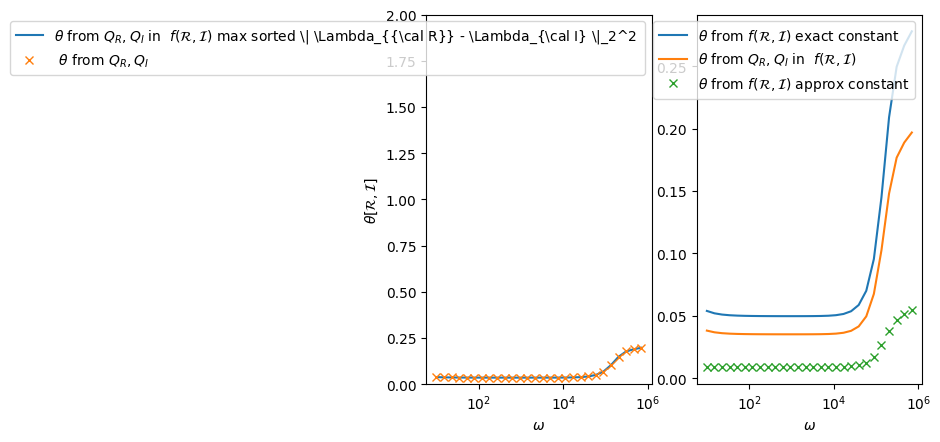

1.3355422478415457e-20 -6.850092458263079e-22
norm <0 in Bill_measure_perm
2.019039553736656e-20 -1.0355799014359135e-21
norm <0 in Bill_measure_perm
3.052333931363161e-20 -1.565563875983262e-21
norm <0 in Bill_measure_perm
4.6144432656334975e-20 -2.3667804236169465e-21
norm <0 in Bill_measure_perm
6.976003468545565e-20 -3.578039575649079e-21
norm <0 in Bill_measure_perm
1.0546159088327307e-19 -5.4091907750989794e-21
norm <0 in Bill_measure_perm
1.5943458201446347e-19 -8.177478815569381e-21
norm <0 in Bill_measure_perm
2.4103053163802026e-19 -1.2362505188343411e-20
norm <0 in Bill_measure_perm
3.6438845631991617e-19 -1.8689314996629655e-20
norm <0 in Bill_measure_perm
5.508889524413662e-19 -2.8253997767418286e-20
norm <0 in Bill_measure_perm
8.328739601252244e-19 -4.271354022667007e-20
norm <0 in Bill_measure_perm
1.2593038332208535e-18 -6.457274630997624e-20
norm <0 in Bill_measure_perm
1.9044255959945294e-18 -9.761766920423165e-20
norm <0 in Bill_measure_perm
2.881277286305446e-18 -1

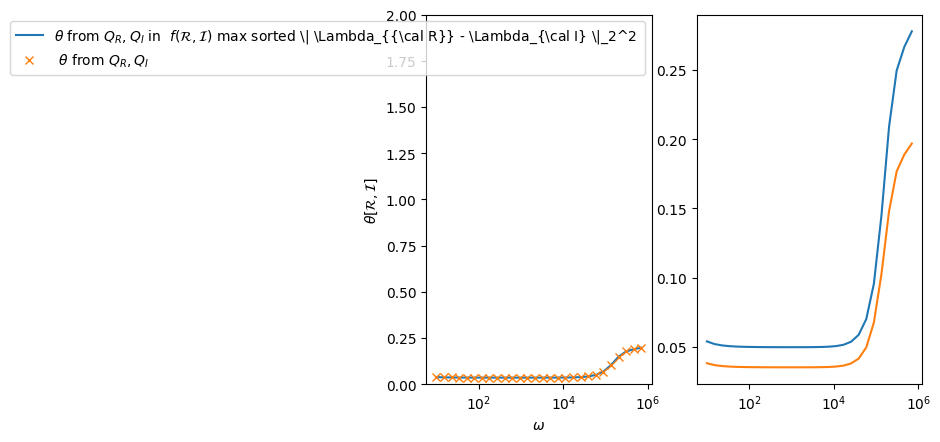

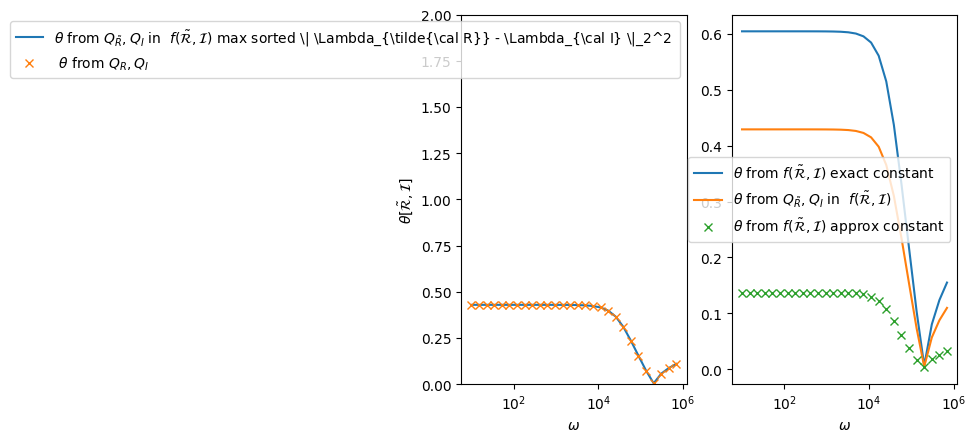

In [19]:
DirList=["CSG_TwoTetra/al_0.001_mu_1_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_2_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_8_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_16_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_32_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_64_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_128_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/"]
DirList=["CSG_TwoTetra/al_0.001_mu_2_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/"]
for directory in DirList:
    print(directory)
    outputplots_opt(directory)


## Two Tetra Inhomogeneous

In [7]:
DirList=["CSG_TwoTetra/al_0.001_mu_1_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_2,1_sig_1e7,1e7/1e1-1e8_40_el_21672_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_4,1_sig_1e7,1e7/1e1-1e8_40_el_21672_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_8,1_sig_1e7,1e7/1e1-1e8_40_el_21672_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_16,1_sig_1e7,1e7/1e1-1e8_40_el_21780_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_32,1_sig_1e7,1e7/1e1-1e8_40_el_21672_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_64,1_sig_1e7,1e7/1e1-1e8_40_el_21672_ord_3_POD_13_1e-7/Data/"]
#DirList=["CSG_TwoTetra/al_0.001_mu_4,1_sig_1e7,1e7/1e1-1e8_40_el_21672_ord_3_POD_13_1e-7/Data/",]
for directory in DirList:
    print(directory)
    outputplots_opt(directory)


## Homogeneous Irregular Hexahedron

OCC_step_irreg_hexahedron/al_0.01_mu_1_sig_1e7/1e1-1e8_40_el_23844_ord_3_POD_13_1e-7/Data/
1.85874940493381e-23 1.0597271410324052e-24
6.422198032096496e-23 3.666180620061109e-24
2.2189410819826816e-22 1.2677787155101144e-23
7.666672632786964e-22 4.382755463301345e-23
2.6489056853501373e-21 1.514841525941091e-22
9.152143959841153e-21 5.235163473463961e-22
3.1620741649719294e-20 1.8090578706469222e-21
1.0924589006026638e-19 6.2508747886041244e-21
3.7739952881027306e-19 2.1596916296990135e-20
1.3035075709986712e-18 7.460789453081684e-20
4.500220552462024e-18 2.576709034972034e-19
1.552085584142761e-17 8.89415675869219e-19
5.3406892281875307e-17 3.0662515138415955e-18
1.8281064963720315e-16 1.0541523903321789e-17
6.183645341181332e-16 3.601433144745896e-17
2.036651438134573e-15 1.2131998850557536e-16
6.3279444617264955e-15 3.961544422057544e-16
1.7417963014641748e-14 1.2103418878598822e-15
3.8252566095940626e-14 3.240710463260907e-15
5.969931798270572e-14 6.911026913746899e-15
6.538262608

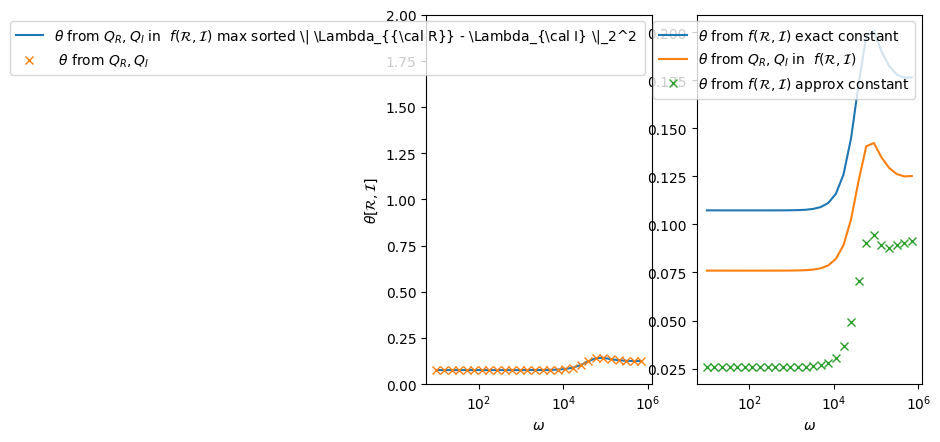

1.8587494049338113e-23 1.0597271410323846e-24
6.422198032096491e-23 3.6661806200611326e-24
2.2189410819826816e-22 1.2677787155101214e-23
7.666672632786956e-22 4.382755463301298e-23
2.6489056853501388e-21 1.5148415259410947e-22
9.152143959841165e-21 5.235163473463976e-22
3.162074164971932e-20 1.809057870646892e-21
1.0924589006026633e-19 6.250874788604197e-21
3.7739952881027345e-19 2.1596916296989798e-20
1.3035075709986712e-18 7.46078945308153e-20
4.500220552462024e-18 2.5767090349720957e-19
1.5520855841427623e-17 8.894156758692128e-19
5.3406892281875307e-17 3.066251513841608e-18
1.8281064963720325e-16 1.0541523903321962e-17
6.183645341181336e-16 3.601433144745926e-17
2.0366514381345714e-15 1.2131998850557457e-16
6.327944461726505e-15 3.9615444220575363e-16
1.7417963014641735e-14 1.2103418878598601e-15
3.8252566095940626e-14 3.2407104632608943e-15
5.969931798270572e-14 6.911026913747e-15
6.538262608152762e-14 1.0782464100130017e-14
5.977052270930541e-14 1.2439807731418867e-14
5.466192862

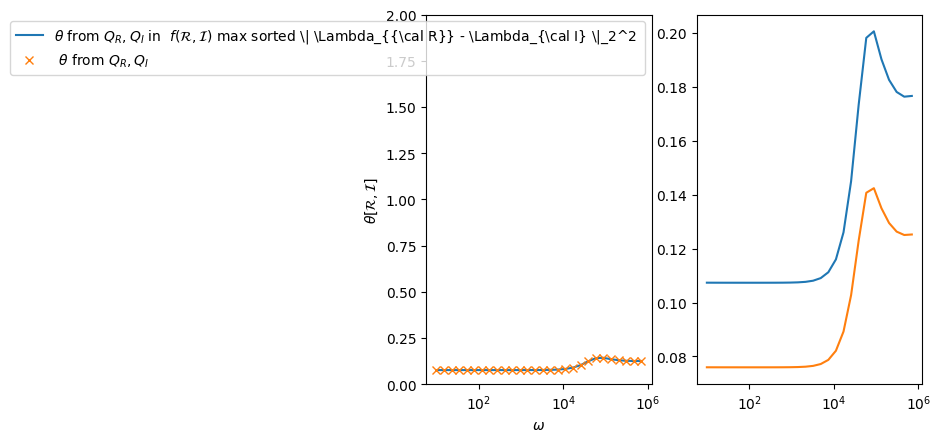

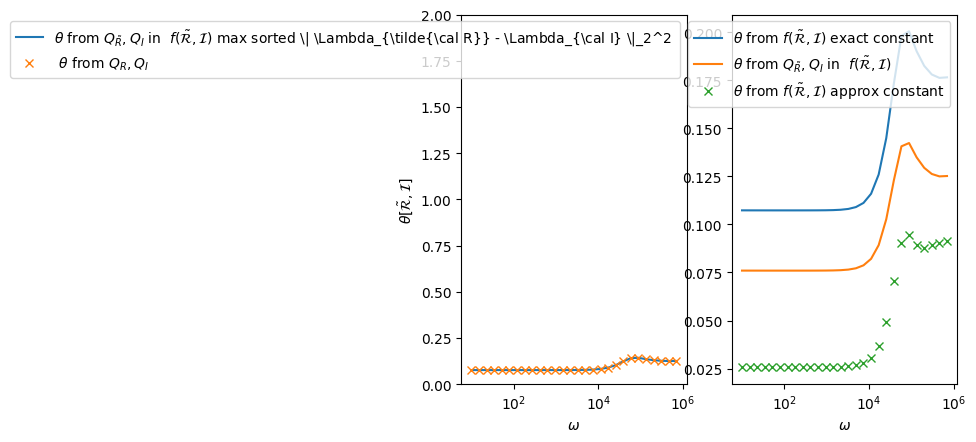

OCC_step_irreg_hexahedron/al_0.01_mu_2_sig_1e7/1e1-1e8_40_el_23844_ord_3_POD_13_1e-7/Data/
3.8164786177485284e-23 3.030262411871307e-25
1.3186373451105283e-22 1.0470794766817868e-24
4.556030658495256e-22 3.6179797937205575e-24
1.574149132640377e-21 1.2500950559771204e-23
5.438774403053246e-21 4.319283458157474e-23
1.879088785728006e-20 1.4923505138668633e-22
6.491924084913952e-20 5.156017742837985e-22
2.242609932284444e-19 1.781256768019394e-21
7.745143169192813e-19 6.152753974071283e-21
2.673414269568158e-18 2.124498866528513e-20
9.216320815807656e-18 7.329735541424364e-20
3.168141573967286e-17 2.524126579600913e-19
1.0819815717443237e-16 8.655570613935965e-19
3.641044927766221e-16 2.939891730263079e-18
1.185507758112395e-15 9.775712343077734e-18
3.592751803937208e-15 3.1060047361448954e-17
9.401465753505091e-15 9.019770305483722e-17
1.8890344165071325e-14 2.2583332117440736e-16
2.632928238311338e-14 4.764531921747865e-16
2.7369734266781776e-14 8.634549110429689e-16
2.7437613111265437

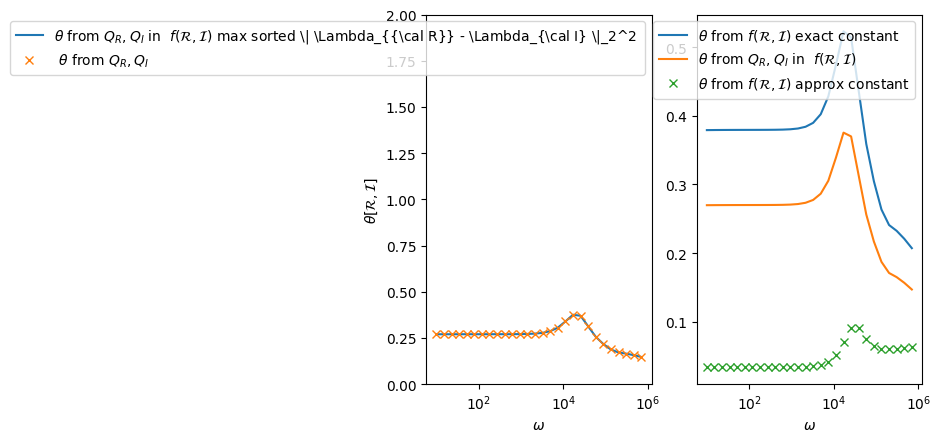

2.2316763279616172e-17 -3.340192293803825e-19
norm <0 in Bill_measure_perm
3.3737976958540864e-17 -5.049611887997789e-19
norm <0 in Bill_measure_perm
5.100440723932036e-17 -7.633851284829771e-19
norm <0 in Bill_measure_perm
7.710779508910952e-17 -1.1540575972374487e-18
norm <0 in Bill_measure_perm
1.1657172825651083e-16 -1.7446443854397425e-18
norm <0 in Bill_measure_perm
1.7623743920309542e-16 -2.637402393414295e-18
norm <0 in Bill_measure_perm
2.664562625978001e-16 -3.986787920617162e-18
norm <0 in Bill_measure_perm
4.029079231852409e-16 -6.025844738582323e-18
norm <0 in Bill_measure_perm
6.094030265682076e-16 -9.105299778863279e-18
norm <0 in Bill_measure_perm
9.223042561416522e-16 -1.3749939490305814e-17
norm <0 in Bill_measure_perm
1.3978404797024761e-15 -2.073462232205921e-17
norm <0 in Bill_measure_perm
2.1252861568400025e-15 -3.1168947475872555e-17
norm <0 in Bill_measure_perm
3.2537880799208346e-15 -4.653258897702245e-17
norm <0 in Bill_measure_perm
5.053522252243713e-15 -6.84

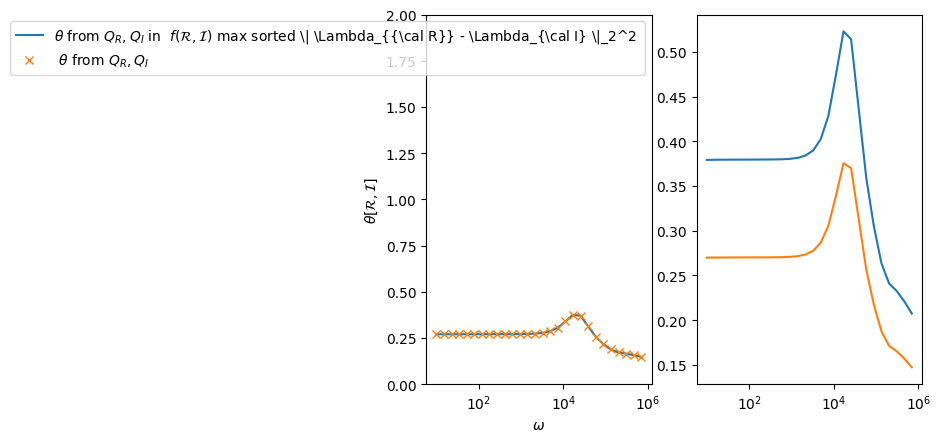

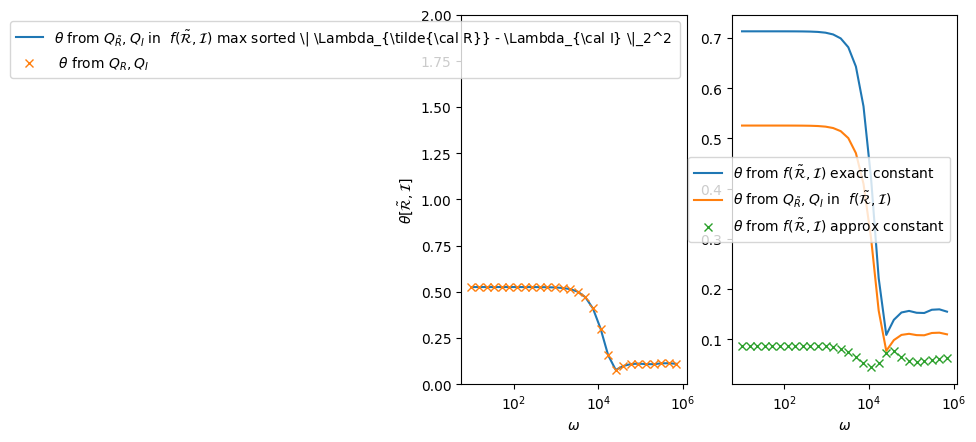

OCC_step_irreg_hexahedron/al_0.01_mu_4_sig_1e7/1e1-1e8_40_el_23844_ord_3_POD_13_1e-7/Data/
1.716403024229051e-23 7.683404413683127e-25
5.930412103912185e-23 2.6546064506656416e-24
2.0490208963803918e-22 9.171717383389125e-24
7.079486408876845e-22 3.168856603152053e-23
2.445936497893096e-21 1.0948446143433498e-22
8.450117073165743e-21 3.782633855369974e-22
2.9189193606315337e-20 1.3068189618061851e-21
1.0079737391565811e-19 4.51427538909133e-21
3.4783621879075535e-19 1.5590155107153535e-20
1.198430295837568e-18 5.381068378655567e-20
4.114200529611447e-18 1.8551099661292586e-19
1.400910205069655e-17 6.381006304027046e-19
4.683463824388752e-17 2.1877179288119285e-18
1.5035477747948577e-16 7.481868601086465e-18
4.4211298106968657e-16 2.525826300425316e-17
1.078517544602346e-15 7.417905692671952e-17
1.8447324557544057e-15 1.4469220755283907e-16
2.751823281944057e-15 3.3077983735631436e-16
3.4776656693123913e-15 2.8592891808795153e-16
2.321919807013262e-15 3.1499553669000966e-16
1.9159165509

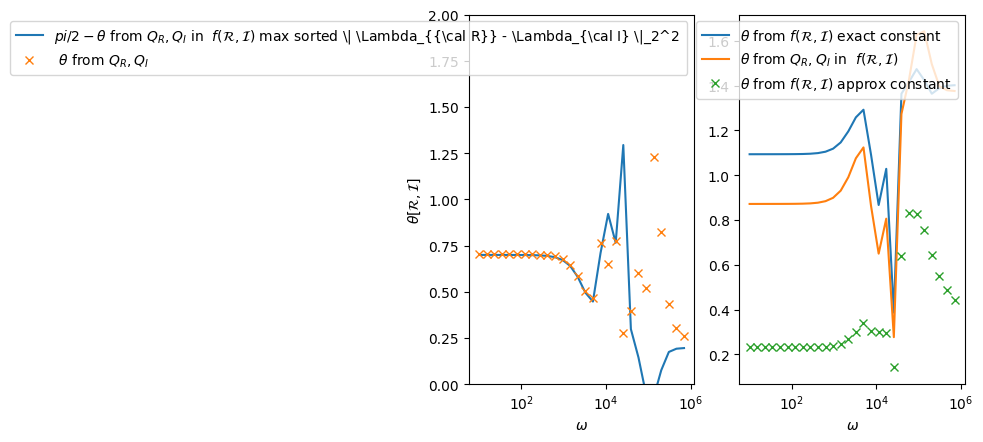

3.925176703549826e-17 -1.0266790664175181e-17
norm <0 in Bill_measure_perm
5.933975107425258e-17 -1.5521074129554023e-17
norm <0 in Bill_measure_perm
8.970804073421492e-17 -2.3464358674591203e-17
norm <0 in Bill_measure_perm
1.3561729266568575e-16 -3.547278260752061e-17
norm <0 in Bill_measure_perm
2.0501909509749186e-16 -5.362669470984261e-17
norm <0 in Bill_measure_perm
3.0992983113239003e-16 -8.107089691797191e-17
norm <0 in Bill_measure_perm
4.684995920736413e-16 -1.2255887020440527e-16
norm <0 in Bill_measure_perm
7.081121411250734e-16 -1.852742106353178e-16
norm <0 in Bill_measure_perm
1.0699759977679843e-15 -2.800679451526598e-16
norm <0 in Bill_measure_perm
1.615740110274027e-15 -4.2331363735339326e-16
norm <0 in Bill_measure_perm
2.436406887749773e-15 -6.396595599064749e-16
norm <0 in Bill_measure_perm
3.662306370955298e-15 -9.660138393444686e-16
norm <0 in Bill_measure_perm
5.467908908312696e-15 -1.4569670508627198e-15
norm <0 in Bill_measure_perm
8.05449610298242e-15 -2.1905

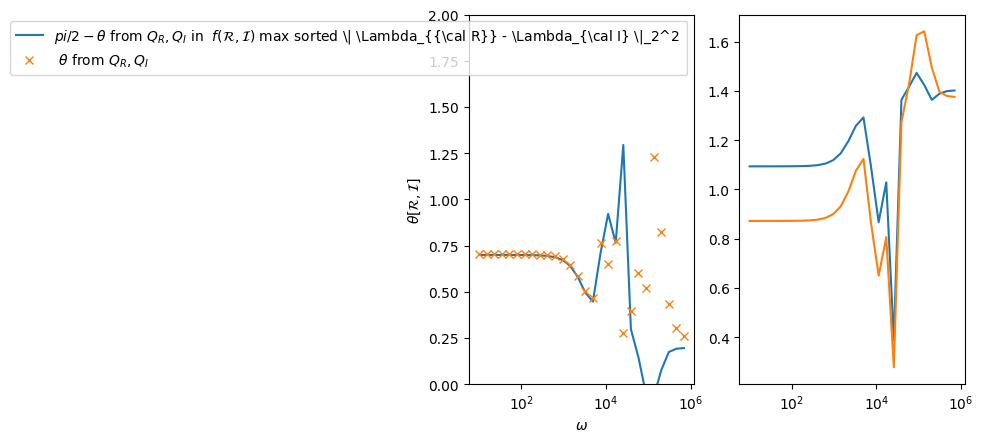

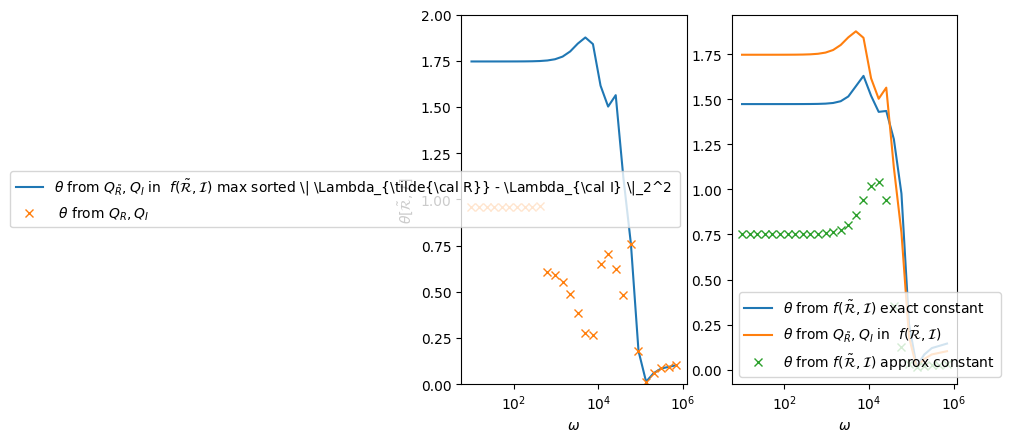

OCC_step_irreg_hexahedron/al_0.01_mu_8_sig_1e7/1e1-1e8_40_el_23844_ord_3_POD_13_1e-7/Data/
2.926318324551934e-22 2.6805135900512104e-24
1.011057899736423e-21 9.249676352150394e-24
3.493258010443494e-21 3.193331876990375e-23
1.2069312553583487e-20 1.1028720641927333e-22
4.169903244379064e-20 3.8104037662930155e-22
1.4406177422198532e-19 1.31720524353743e-21
4.976492854062196e-19 4.558085109188919e-21
1.7186499136419943e-18 1.5807849092004578e-20
5.931969908932783e-18 5.510028944087057e-20
2.0447333054527854e-17 1.943649426532508e-19
7.02717567050013e-17 7.0603737507291955e-19
2.399089841960109e-16 2.7600233668907517e-18
8.072197273192919e-16 1.2738654965747395e-17
2.6303411935642194e-15 7.783380889991614e-17
7.983309751688049e-15 6.589671491668543e-16
2.0893457561110958e-14 5.16427500974047e-15
4.2328867759882816e-14 1.1792935389768829e-14
6.225276696897214e-14 1.481763198138213e-14
6.95020421359374e-14 1.562015679669467e-14
6.463699705982922e-14 1.4321141291734267e-14
5.228623107709705

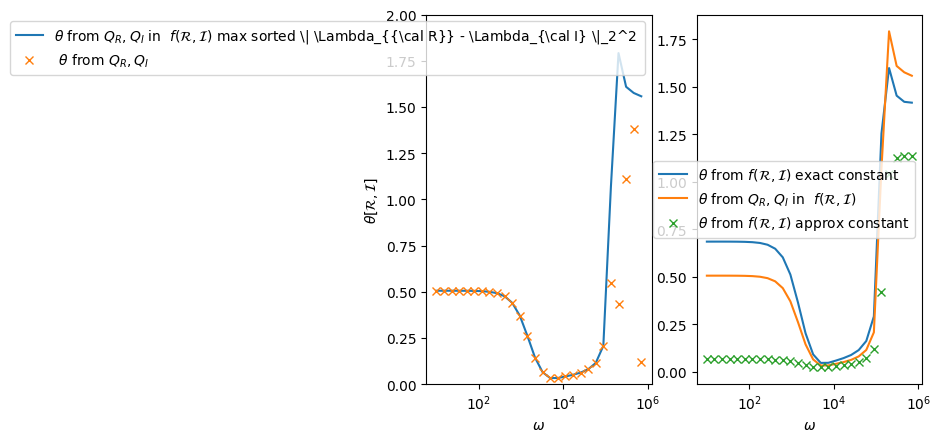

4.523419908401718e-16 -2.919274502928193e-16
norm <0 in Bill_measure_perm
6.838379828852083e-16 -4.413277861970002e-16
norm <0 in Bill_measure_perm
1.0338045095325853e-15 -6.671853908278012e-16
norm <0 in Bill_measure_perm
1.5628636311894749e-15 -1.0086240380015474e-15
norm <0 in Bill_measure_perm
2.362642123556942e-15 -1.5247774320582162e-15
norm <0 in Bill_measure_perm
3.571589464469527e-15 -2.3049987584732856e-15
norm <0 in Bill_measure_perm
5.3987696565357316e-15 -3.48421904171781e-15
norm <0 in Bill_measure_perm
8.159409578774661e-15 -5.265902294521035e-15
norm <0 in Bill_measure_perm
1.2327190349548405e-14 -7.955839021822022e-15
norm <0 in Bill_measure_perm
1.8608289746427138e-14 -1.2010091980133377e-14
norm <0 in Bill_measure_perm
2.803600281506805e-14 -1.8096626420238884e-14
norm <0 in Bill_measure_perm
4.2054047893831475e-14 -2.7151081419102353e-14
norm <0 in Bill_measure_perm
6.243857046003301e-14 -4.0333633318939934e-14
norm <0 in Bill_measure_perm
9.051944527786134e-14 -5.8

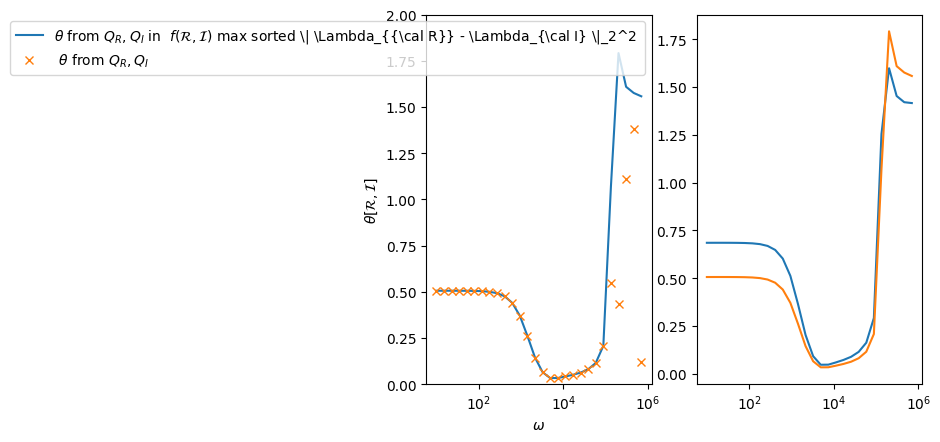

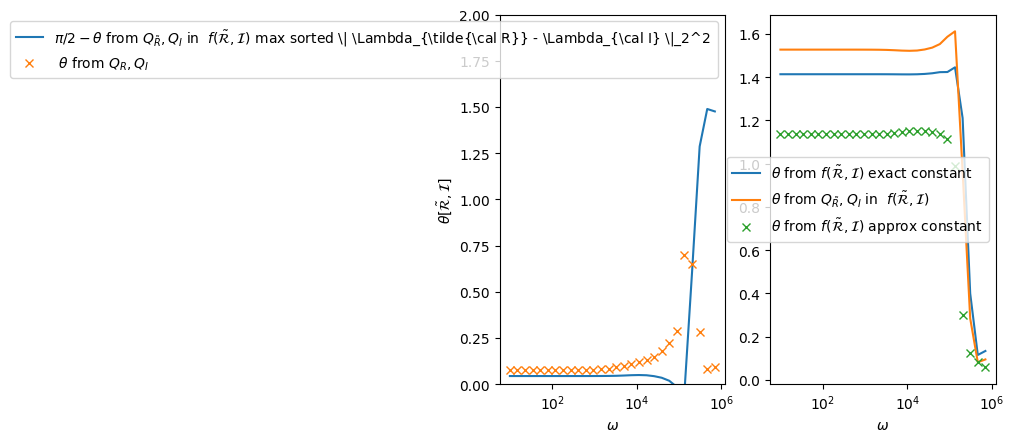

OCC_step_irreg_hexahedron/al_0.01_mu_16_sig_1e7/1e1-1e8_40_el_23844_ord_3_POD_13_1e-7/Data/
2.401075439811854e-21 2.117838473946597e-22
8.295887895407073e-21 7.317874051398989e-22
2.866257269603521e-20 2.5286261888974985e-21
9.902759188193151e-20 8.738011826005398e-21
3.4211439214448084e-19 3.020039700417626e-20
1.1817539899793636e-18 1.0441966232347447e-19
4.080815565074167e-18 3.6136217792606293e-19
1.4081740552641542e-17 1.2531300144050615e-18
4.8512777512862344e-17 4.3659293196399635e-18
1.6650810735404176e-16 1.5371064576575553e-17
5.666555026411509e-16 5.536743427452054e-17
1.8915431722307442e-15 2.0894464956601187e-16
6.0477041041422046e-15 8.515642348017474e-16
1.7648850498665734e-14 3.5749111140549834e-15
4.3529605533569695e-14 1.1000070907951415e-14
8.467122060193479e-14 2.0499072438912745e-14
1.3027861194308322e-13 2.958333716654339e-14
1.6935219330954585e-13 3.8458658882231135e-14
1.9625022412058284e-13 4.584816562751032e-14
2.059202396756774e-13 4.7213290108948894e-14
1.95

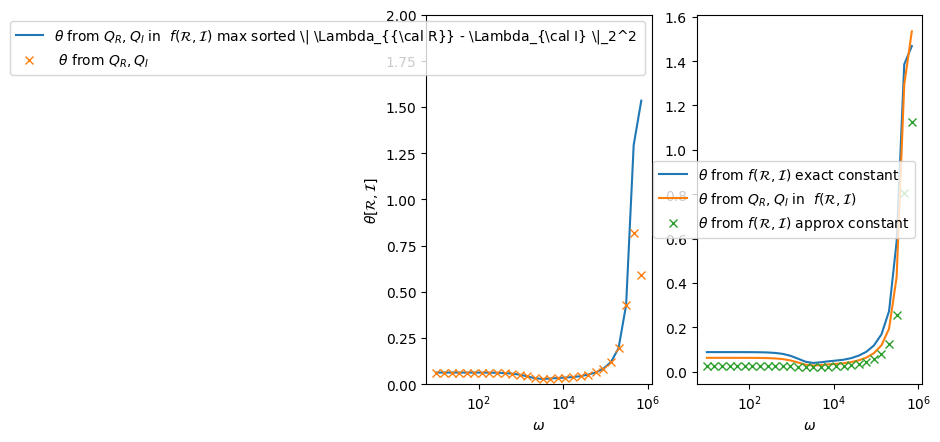

1.570345582387075e-15 -1.0313936161773013e-15
norm <0 in Bill_measure_perm
2.373994849515859e-15 -1.5592258128032479e-15
norm <0 in Bill_measure_perm
3.588896304616244e-15 -2.3571664386085892e-15
norm <0 in Bill_measure_perm
5.425431497860484e-15 -3.5633939723732555e-15
norm <0 in Bill_measure_perm
8.201436303074099e-15 -5.386665050530577e-15
norm <0 in Bill_measure_perm
1.2396668914298268e-14 -8.142095602816642e-15
norm <0 in Bill_measure_perm
1.8733867096657477e-14 -1.2304422526794378e-14
norm <0 in Bill_measure_perm
2.829685495068277e-14 -1.858565740520871e-14
norm <0 in Bill_measure_perm
4.269385572061319e-14 -2.8042630877298668e-14
norm <0 in Bill_measure_perm
6.42523806390405e-14 -4.2205955154368095e-14
norm <0 in Bill_measure_perm
9.613942329631803e-14 -6.316218725343758e-14
norm <0 in Bill_measure_perm
1.419836171264834e-13 -9.331592813438719e-14
norm <0 in Bill_measure_perm
2.0372123700962788e-13 -1.340030124093524e-13
norm <0 in Bill_measure_perm
2.753826517932564e-13 -1.8145

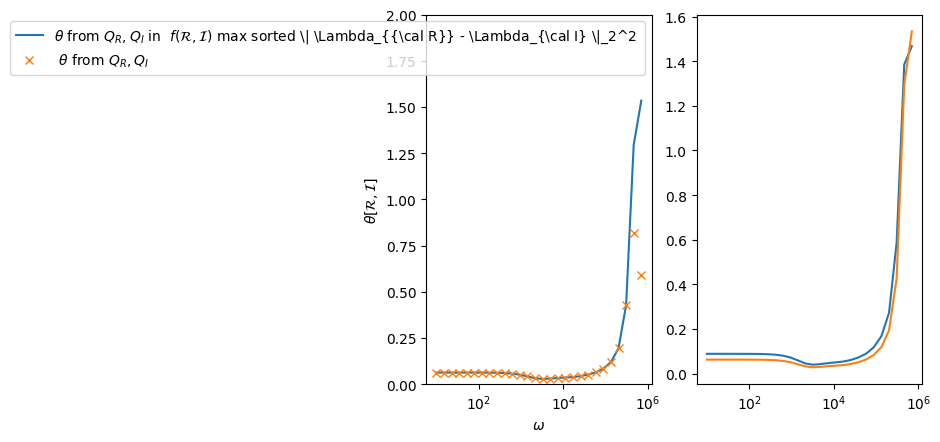

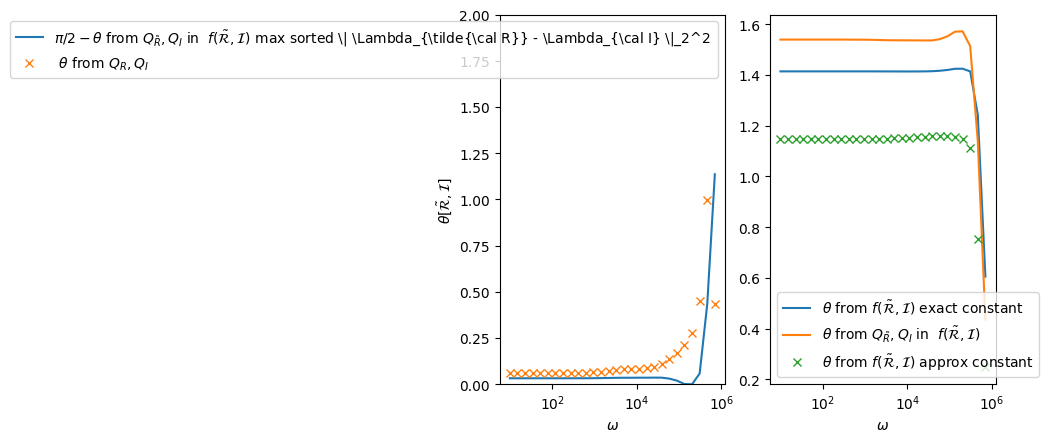

OCC_step_irreg_hexahedron/al_0.01_mu_32_sig_1e7/1e1-1e8_40_el_23844_ord_3_POD_13_1e-7/Data/
8.88247900258882e-21 9.720383331461385e-22
3.068858199648191e-20 3.36099988107408e-21
1.0602466687077622e-19 1.1619138613208075e-20
3.662722961218485e-19 4.016773431601379e-20
1.2650944483554381e-18 1.3890016572020165e-19
4.36777953216518e-18 4.8072972624348445e-19
1.5065469495342524e-17 1.6673425712550157e-18
5.185045840023925e-17 5.811803734093641e-18
1.7756026808415547e-16 2.0486177125532325e-17
6.011384992375214e-16 7.395163808373582e-17
1.9832617293072345e-15 2.789276791987323e-16
6.18311655905052e-15 1.1015873215029862e-15
1.7224328942271056e-14 3.962635357219803e-15
4.0050079245894617e-14 9.838022906823001e-15
7.570081262388669e-14 1.7463549912445212e-14
1.213407929162256e-13 2.661562966891135e-14
1.7482319842887431e-13 3.8315989266663906e-14
2.325127007484879e-13 5.076121806394857e-14
2.865660559873124e-13 6.253923492602378e-14
3.2702388355828584e-13 7.302335010573285e-14
3.4548322052892

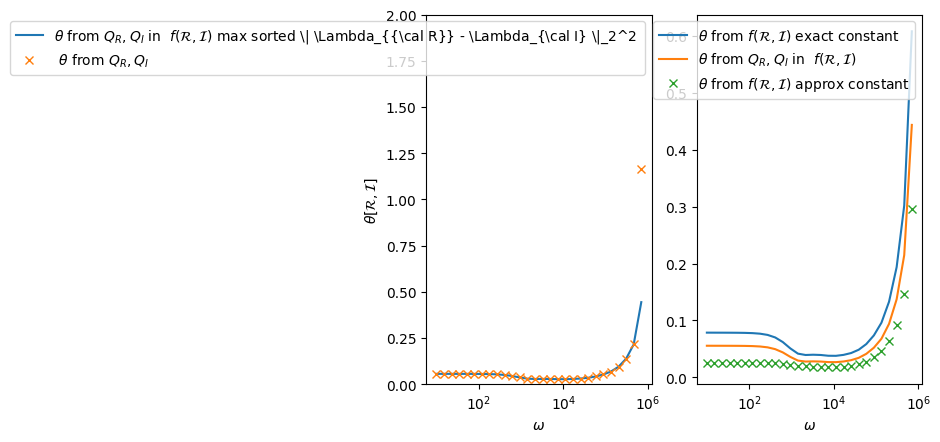

3.005878888678229e-15 -1.981579997983548e-15
norm <0 in Bill_measure_perm
4.544140178834816e-15 -2.995656043531875e-15
norm <0 in Bill_measure_perm
6.869467221936942e-15 -4.5285951823819635e-15
norm <0 in Bill_measure_perm
1.0384223863115567e-14 -6.845654635528645e-15
norm <0 in Bill_measure_perm
1.5695622100724125e-14 -1.034714693730045e-14
norm <0 in Bill_measure_perm
2.3717930785078266e-14 -1.5635849566883808e-14
norm <0 in Bill_measure_perm
3.582056423304422e-14 -2.361473342790442e-14
norm <0 in Bill_measure_perm
5.4029909111365534e-14 -3.562036556500352e-14
norm <0 in Bill_measure_perm
8.125955260559868e-14 -5.3575854762191814e-14
norm <0 in Bill_measure_perm
1.2141025971724016e-13 -8.006048052795946e-14
norm <0 in Bill_measure_perm
1.7875253259361765e-13 -1.1791314756426425e-13
norm <0 in Bill_measure_perm
2.550359229401722e-13 -1.6834783601074325e-13
norm <0 in Bill_measure_perm
3.427239152314031e-13 -2.264956679578213e-13
norm <0 in Bill_measure_perm
4.2103088208850323e-13 -2.7

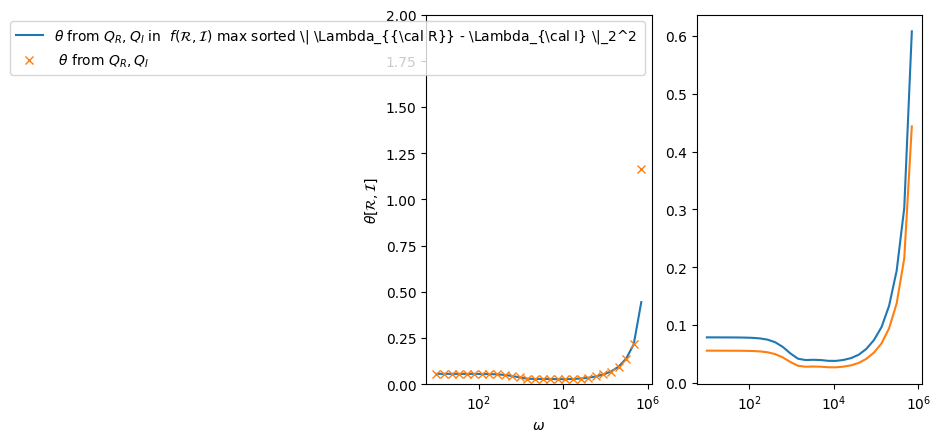

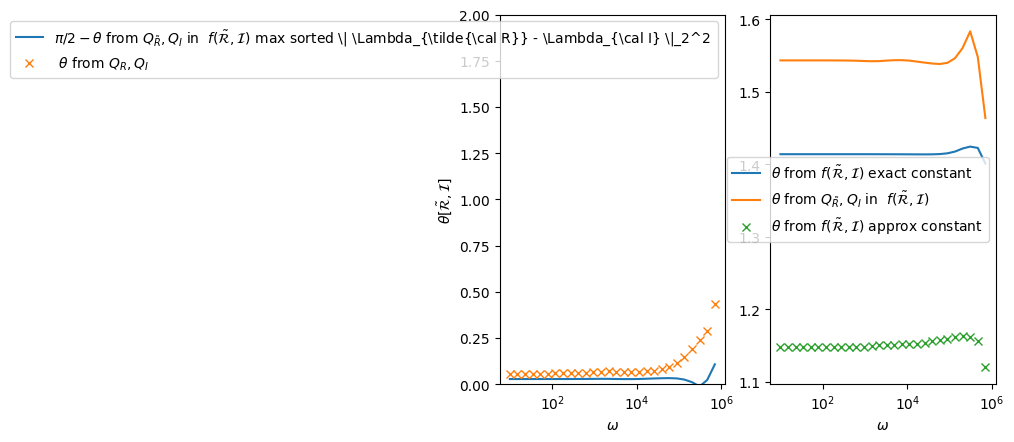

OCC_step_irreg_hexahedron/al_0.01_mu_64_sig_1e7/1e1-1e8_40_el_23844_ord_3_POD_13_1e-7/Data/
2.3344513560291743e-20 2.6748332933481625e-21
8.065024290850321e-20 9.244859935237758e-21
2.785968000716208e-19 3.1959898673624905e-20
9.621231416646105e-19 1.105534655989673e-19
3.3206243767189735e-18 3.8296356790263483e-19
1.144462486216332e-17 1.3309419173950873e-18
3.931825623259431e-17 4.659497696255518e-18
1.3409428685501726e-16 1.657267552162491e-17
4.497636869129433e-16 6.081558678189743e-17
1.4531897182770737e-15 2.3371900186617783e-16
4.339817171410326e-15 8.959390516563147e-16
1.1262577308075418e-14 2.742570458867673e-15
2.4288002455331458e-14 5.8504195277091355e-15
4.43433881683713e-14 1.0074939222787158e-14
7.264683455695564e-14 1.6214210681308392e-14
1.1123919107422347e-13 2.4726309710716862e-14
1.6119211246528856e-13 3.4893833317984405e-14
2.212052091951498e-13 4.797239400714656e-14
2.873414016544754e-13 6.34328839648502e-14
3.5267612333148124e-13 7.709636035550868e-14
4.088179054

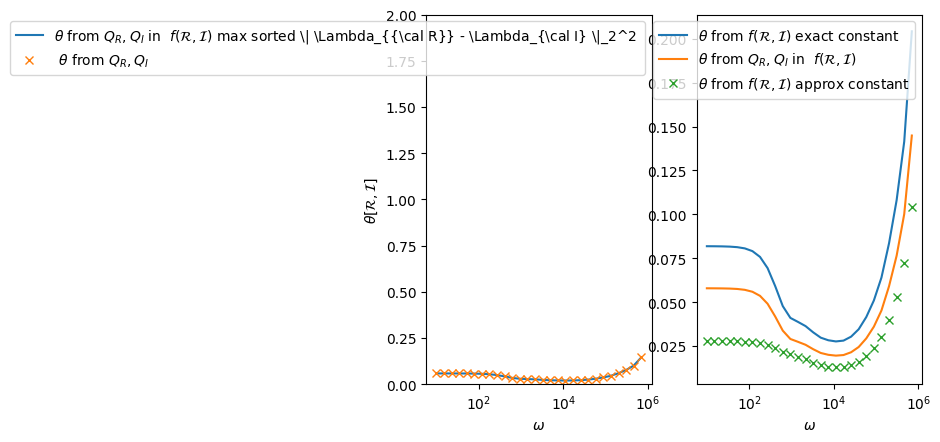

4.228626470228613e-15 -2.7915698364824564e-15
norm <0 in Bill_measure_perm
6.392438418011696e-15 -4.220034604113932e-15
norm <0 in Bill_measure_perm
9.662914618324234e-15 -6.3790830388475576e-15
norm <0 in Bill_measure_perm
1.460464962036404e-14 -9.641458795181366e-15
norm <0 in Bill_measure_perm
2.206684698888127e-14 -1.4567844508564494e-14
norm <0 in Bill_measure_perm
3.331836886662678e-14 -2.1996140764715837e-14
norm <0 in Bill_measure_perm
5.0226147014536874e-14 -3.315966333863052e-14
norm <0 in Bill_measure_perm
7.543801056204547e-14 -4.9809180379256846e-14
norm <0 in Bill_measure_perm
1.1237679664249201e-13 -7.421294119731394e-14
norm <0 in Bill_measure_perm
1.644096159581395e-13 -1.0861722895857653e-13
norm <0 in Bill_measure_perm
2.3190673443332653e-13 -1.533132998340203e-13
norm <0 in Bill_measure_perm
3.076816613190962e-13 -2.0359502200314415e-13
norm <0 in Bill_measure_perm
3.7920319410754343e-13 -2.511224991367351e-13
norm <0 in Bill_measure_perm
4.406226333775145e-13 -2.91

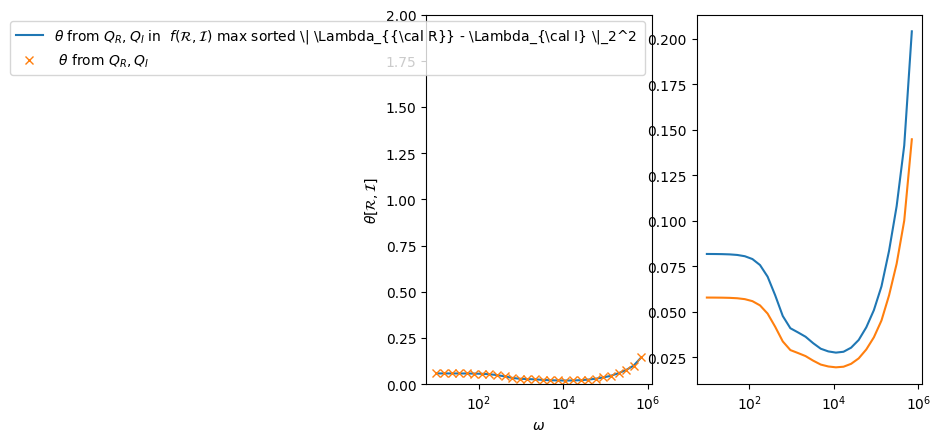

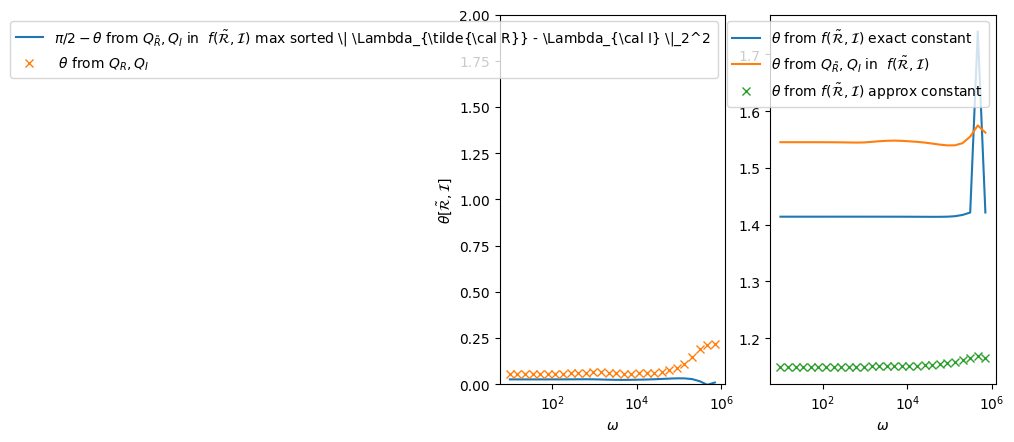

In [113]:
DirList=["OCC_step_irreg_hexahedron/al_0.01_mu_1_sig_1e7/1e1-1e8_40_el_23844_ord_3_POD_13_1e-7/Data/",
         "OCC_step_irreg_hexahedron/al_0.01_mu_2_sig_1e7/1e1-1e8_40_el_23844_ord_3_POD_13_1e-7/Data/",
         "OCC_step_irreg_hexahedron/al_0.01_mu_4_sig_1e7/1e1-1e8_40_el_23844_ord_3_POD_13_1e-7/Data/",
         "OCC_step_irreg_hexahedron/al_0.01_mu_8_sig_1e7/1e1-1e8_40_el_23844_ord_3_POD_13_1e-7/Data/",
         "OCC_step_irreg_hexahedron/al_0.01_mu_16_sig_1e7/1e1-1e8_40_el_23844_ord_3_POD_13_1e-7/Data/",
         "OCC_step_irreg_hexahedron/al_0.01_mu_32_sig_1e7/1e1-1e8_40_el_23844_ord_3_POD_13_1e-7/Data/",
         "OCC_step_irreg_hexahedron/al_0.01_mu_64_sig_1e7/1e1-1e8_40_el_23844_ord_3_POD_13_1e-7/Data/",]

for directory in DirList:
    print(directory)
    outputplots_opt(directory)

## Concave Irregular Polyhedron

OCC_step_irreg_hexahedron_concave/al_0.01_mu_32_sig_1e7/1e1-1e8_40_el_21908_ord_3_POD_13_1e-7/Data/
1.5743365259067616e-21 3.9436880468619055e-22
5.4395180521253255e-21 1.3628988283431204e-21
1.8794084801794022e-20 4.709804852988483e-21
6.493495318675152e-20 1.6275971153128772e-20
2.243515354943295e-19 5.625221624166442e-20
7.7511229001542125e-19 1.9447849201922105e-19
2.677727973088991e-18 6.728883668940164e-19
9.248911821925267e-18 2.3323947319689083e-18
3.1932435794510494e-17 8.117609749224553e-18
1.1013481232507601e-16 2.849833342464366e-17
3.788122311762097e-16 1.017078738506636e-16
1.2922975388738346e-15 3.724020545475677e-16
4.29359847427385e-15 1.3629769297686197e-15
1.3209250807369801e-14 4.605817360290933e-15
3.456566236529643e-14 1.2706554745327956e-14
7.239330960373932e-14 2.693689575844689e-14
1.2279146145635713e-13 3.9448937372075984e-14
1.7758633994521815e-13 3.481368661510389e-14
2.2921712589323436e-13 4.3118564564061905e-14
2.70795491664975e-13 5.1934007644858705e-14
2

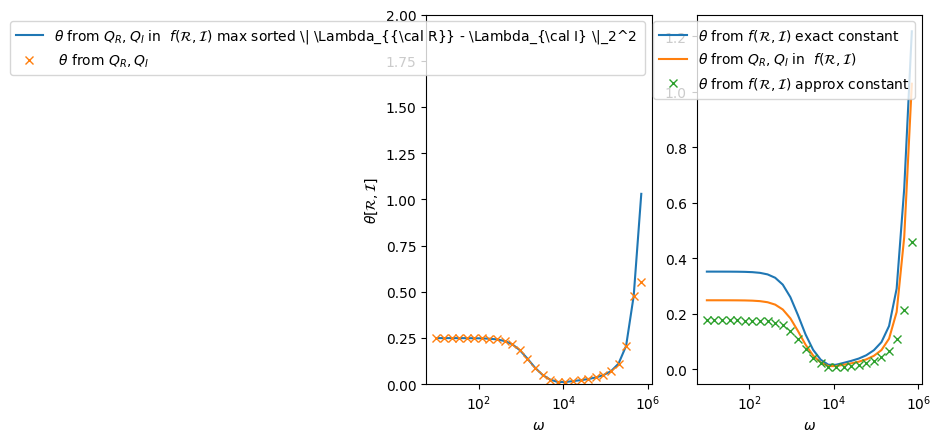

1.7807447901436766e-15 -1.1814202508284776e-15
norm <0 in Bill_measure_perm
2.692077716503586e-15 -1.7860369856445805e-15
norm <0 in Bill_measure_perm
4.069788824828358e-15 -2.700069972787666e-15
norm <0 in Bill_measure_perm
6.152511489113338e-15 -4.08184246044534e-15
norm <0 in Bill_measure_perm
9.300889354260904e-15 -6.170634104885097e-15
norm <0 in Bill_measure_perm
1.4059731774439111e-14 -9.327941296307403e-15
norm <0 in Bill_measure_perm
2.1251270475643944e-14 -1.4099429365409819e-14
norm <0 in Bill_measure_perm
3.211365912882051e-14 -2.1307098151582732e-14
norm <0 in Bill_measure_perm
4.850149851097342e-14 -3.2183255151374856e-14
norm <0 in Bill_measure_perm
7.315639170310008e-14 -4.8553035918656413e-14
norm <0 in Bill_measure_perm
1.0999025154384372e-13 -7.303129252944056e-14
norm <0 in Bill_measure_perm
1.6401488660629397e-13 -1.089971852037726e-13
norm <0 in Bill_measure_perm
2.3944499104556196e-13 -1.593624587707227e-13
norm <0 in Bill_measure_perm
3.3284543778969894e-13 -2.2

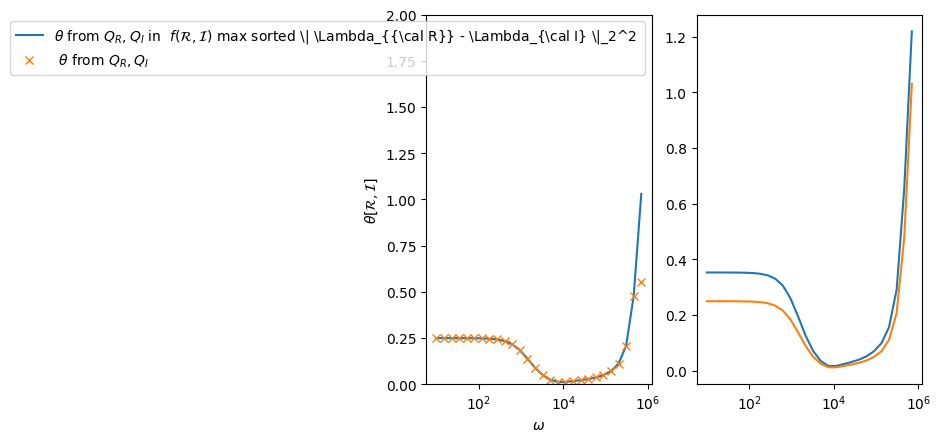

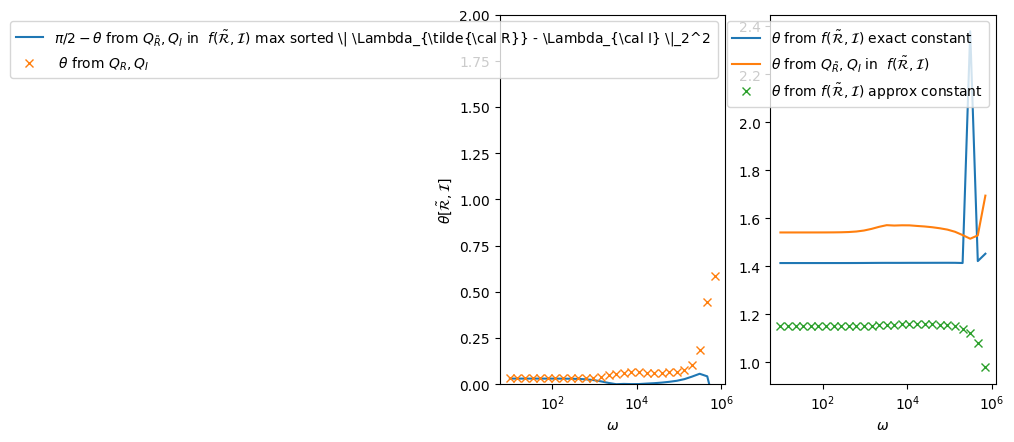

In [114]:
DirList=["OCC_step_irreg_hexahedron_concave/al_0.01_mu_32_sig_1e7/1e1-1e8_40_el_21908_ord_3_POD_13_1e-7/Data/"]

for directory in DirList:
    print(directory)
    outputplots_opt(directory)
